**Proyecto Integrador: Predicción del Riesgo de Abandono Académico en Estudiantes Universitarios**<br>
*por: Natali Angarita Escolar, Gabriel Fernández Velásquez, Angélica Sierra Cerpa, Maria José Berrio*<br>
*Departamento de Matemáticas y Estadística, Facultad de Ciencias Básicas, Universidad del Norte, Barranquilla*



**Objetivo General**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Desarrollar modelos de regresión y clasificación supervisada utilizando el algoritmo <em>K-Nearest Neighbors (KNN)</em> con el fin de abordar dos problemáticas clave en el ámbito educativo:

<ol>
  <li><strong>Estimar la probabilidad de que un estudiante incurra en abandono académico</strong> mediante una clasificación binaria.</li>
  <li><strong>Predecir su índice acumulado esperado al finalizar el semestre</strong> a través de un modelo de regresión continua.</li>
</ol>

Esta propuesta se justifica en la necesidad de contar con herramientas analíticas que permitan a las instituciones educativas anticiparse a situaciones de riesgo académico y actuar de forma preventiva. El uso de <em>KNN</em> se fundamenta en su simplicidad, interpretabilidad y eficacia para problemas tanto de clasificación como de regresión, especialmente cuando se dispone de datos históricos y características cuantificables de los estudiantes. Al integrar ambos enfoques (clasificación y regresión), se busca no solo identificar casos críticos, sino también estimar el rendimiento académico futuro, lo cual proporciona un panorama más completo para la toma de decisiones académicas y de acompañamiento institucional.

</div>


**Análisis Exploratorio**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

En el contexto de una universidad que busca anticiparse al riesgo de deserción de estudiantes de primer año para implementar acciones preventivas, el presente análisis se fundamenta en el conjunto de datos "Predict Students' Dropout and Academic Success" del repositorio UCI Machine Learning, creado por investigadores del Instituto Politécnico de Portalegre, Portugal. Este dataset contiene información histórica de cohortes de estudiantes matriculados en diferentes carreras de pregrado de una institución de educación superior, incluyendo programas de agronomía, diseño, educación, enfermería, periodismo, gestión, servicio social y tecnologías. La base de datos está compuesta por un total de 4.424 registros estudiantiles y 37 variables, las cuales abarcan información conocida al momento de la inscripción del estudiante (trayectoria académica, factores demográficos y socioeconómicos) así como el rendimiento académico al final del primer y segundo semestre. Las variables incluyen características como estado civil, modalidad de aplicación, curso, calificaciones previas, nacionalidad, nivel educativo de los padres, entre otras, con el objetivo de construir modelos de clasificación para predecir la deserción estudiantil y el éxito académico. Para efectos del presente estudio, se utilizarán todas las 37 variables disponibles en el dataset, considerando que cada una aporta información valiosa para el análisis integral del fenómeno educativo y la implementación de estrategias de intervención temprana. A continuación se presenta la carga de la base de datos y las variables contenidas junto con su tipología.

</div>


In [ ]:
import pandas as pd
# Reemplaza "nombre_del_archivo.csv" con el nombre exacto del archivo que subiste
df = pd.read_csv(r"D:/Prueba/data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


| Variable                                     | Tipo de Variable                             |
|----------------------------------------------|-----------------------------------------------|
| Marital Status                               | Cualitativa Nominal                           |
| Application mode                             | Cualitativa Nominal                           |
| Application order                            | Cuantitativa Discreta (ordinal)               |
| Course                                       | Cualitativa Nominal                           |
| Daytime/evening attendance                   | Cualitativa Dicotómica (binaria o dummy)      |
| Previous qualification                       | Cualitativa Ordinal                           |
| Previous qualification (grade)               | Cuantitativa Continua                         |
| Nationality                                  | Cualitativa Nominal                           |
| Mother's qualification                       | Cualitativa Ordinal                           |
| Father's qualification                       | Cualitativa Ordinal                           |
| Mother's occupation                          | Cualitativa Ordinal                           |
| Father's occupation                          | Cualitativa Ordinal                           |
| Admission grade                              | Cuantitativa Continua                         |
| Displaced                                    | Cualitativa Nominal Binaria (dummy)           |
| Educational special needs                    | Cualitativa Nominal Binaria (dummy)           |
| Debtor                                       | Cualitativa Nominal Binaria (dummy)           |
| Tuition fees up to date                      | Cualitativa Nominal Binaria (dummy)           |
| Gender                                       | Cualitativa Nominal Binaria (dummy)           |
| Scholarship holder                           | Cualitativa Nominal Binaria (dummy)           |
| Age at enrollment                            | Cuantitativa Continua                         |
| International                                | Cualitativa Nominal Binaria (dummy)           |
| Curricular units 1st sem (credited)          | Cuantitativa Discreta                         |
| Curricular units 1st sem (enrolled)          | Cuantitativa Discreta                         |
| Curricular units 1st sem (evaluations)       | Cuantitativa Discreta                         |
| Curricular units 1st sem (approved)          | Cuantitativa Discreta                         |
| Curricular units 1st sem (grade)             | Cuantitativa Continua                         |
| Curricular units 1st sem (without evaluations) | Cuantitativa Discreta                       |
| Curricular units 2nd sem (credited)          | Cuantitativa Discreta                         |
| Curricular units 2nd sem (enrolled)          | Cuantitativa Discreta                         |
| Curricular units 2nd sem (evaluations)       | Cuantitativa Discreta                         |
| Curricular units 2nd sem (approved)          | Cuantitativa Discreta                         |
| Curricular units 2nd sem (grade)             | Cuantitativa Continua                         |
| Curricular units 2nd sem (without evaluations) | Cuantitativa Discreta                       |
| Unemployment rate                            | Cuantitativa Continua                         |
| Inflation rate                               | Cuantitativa Continua                         |
| GDP                                          | Cuantitativa Continua                         |
| Target                                       | Cualitativa Nominal (multiclase)              |



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">
Para abordar de manera sistemática el análisis exploratorio de datos, se adoptó una estrategia metodológica que inicia con el examen de las variables cuantitativas continuas, seguido por el análisis de las variables cuanitativas discretas y por ultimo las cualitativas . Esta secuencia metodológica no solo optimiza la comprensión progresiva de la estructura de datos, sino que también permite identificar de manera temprana las relaciones potenciales entre diferentes tipos de variables, estableciendo así una base sólida para el desarrollo de estrategias de predicción de deserción estudiantil más efectivas y fundamentadas estadísticamente.   

</div>



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">
En primer lugar, se abordan las variables cuantitativas continuas ya que proporcionan una comprensión inicial de la distribución, tendencia central y variabilidad de los datos numéricos, lo cual es esencial para identificar patrones de comportamiento estudiantil, outliers potenciales y la necesidad de transformaciones de datos. La seleccion de las variables y la tabla resumen de las medidas de tendencia central y dispersión.
</div>


In [5]:
# Lista de variables continuas según la imagen
vars_continuas = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Crear nuevo DataFrame solo con las variables continuas
Var_Cont = df[vars_continuas]

# Mostrar las primeras filas
Var_Cont.head()
# Crear nuevo DataFrame solo con las variables continuas
Var_Cont = df[vars_continuas]

# Mostrar las primeras filas
Var_Cont.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,122.0,127.3,20,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,19,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,19,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,20,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,45,12.333333,13.000000,13.9,-0.3,0.79


In [6]:
# Crear el resumen estadístico personalizado
resumen = pd.DataFrame(index=Var_Cont.columns)

resumen['Media'] = Var_Cont.mean()
resumen['Desviación'] = Var_Cont.std()
resumen['Mediana'] = Var_Cont.median()
resumen['RI'] = Var_Cont.quantile(0.75) - Var_Cont.quantile(0.25)
resumen['CV'] = resumen['Desviación'] / resumen['Media']
resumen['Mínimo'] = Var_Cont.min()
resumen['Máximo'] = Var_Cont.max()
resumen['Asimetría'] = Var_Cont.skew()
resumen['Curtosis'] = Var_Cont.kurtosis()
resumen['P1'] = Var_Cont.quantile(0.01)
resumen['P5'] = Var_Cont.quantile(0.05)
resumen['P95'] = Var_Cont.quantile(0.95)
resumen['P99'] = Var_Cont.quantile(0.99)
# Redondear a 3 decimales
resumen = resumen.round(3)

# Mostrar el resumen
resumen


,Media,Desviación,Mediana,RI,CV,Mínimo,Máximo,Asimetría,Curtosis,P1,P5,P95,P99
Previous qualification (grade),132.613,13.188,133.100,15.000,0.099,95.00,190.000,0.313,0.968,100.00,110.000,157.000,170.000
Admission grade,126.978,14.482,126.100,16.900,0.114,95.00,190.000,0.531,0.663,99.00,103.415,153.500,166.831
Age at enrollment,23.265,7.588,20.000,6.000,0.326,17.00,70.000,2.055,4.127,18.00,18.000,41.000,50.000
Curricular units 1st sem (grade),10.641,4.844,12.286,2.400,0.455,0.00,18.875,-1.568,0.908,0.00,0.000,14.857,16.000
Curricular units 2nd sem (grade),10.230,5.211,12.200,2.583,0.509,0.00,18.571,-1.314,0.067,0.00,0.000,14.980,16.000
Unemployment rate,11.566,2.664,11.100,4.500,0.230,7.60,16.200,0.212,-0.996,7.60,7.600,16.200,16.200
Inflation rate,1.228,1.383,1.400,2.300,1.126,-0.80,3.700,0.252,-1.039,-0.80,-0.800,3.700,3.700
GDP,0.002,2.270,0.320,3.490,1152.950,-4.06,3.510,-0.394,-1.002,-4.06,-4.060,3.510,3.510


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

El análisis descriptivo de las variables cuantitativas continuas revela patrones heterogéneos en el comportamiento de los datos estudiantiles. Las calificaciones previas (Previous qualification grade) presentaron un promedio de 132.613 puntos con una desviación estándar de 13.188, posicionándose como la variable con mayor variabilidad absoluta en términos de puntuación. Sin embargo, su coeficiente de variación (0.099) indica una dispersión relativa moderada respecto a su media, sugiriendo cierta estabilidad en el rendimiento académico previo de los estudiantes. De manera similar, las calificaciones de admisión (Admission grade) mostraron un comportamiento comparable con una media de 126.978 y desviación estándar de 14.482, evidenciando un patrón consistente en los procesos de selección universitaria. La edad al momento de inscripción (Age at enrollment) exhibe características distintivas con un promedio de 23.265 años y una desviación estándar de 7.588, resultando en el coeficiente de variación más alto (0.326) entre todas las variables analizadas. Este comportamiento indica una considerable heterogeneidad en las edades de ingreso, reflejando la diversidad etaria de la población estudiantil que incluye tanto estudiantes tradicionales como no tradicionales. El rango intercuartílico de 6.000 años confirma esta variabilidad, sugiriendo diferentes trayectorias educativas y momentos de acceso a la educación superior. Las variables relacionadas con el rendimiento académico del primer y segundo semestre (Curricular units 1st sem grade y Curricular units 2nd sem grade) presentan medias de 10.641 y 10.230 respectivamente, con desviaciones estándar moderadas (4.844 y 5.211). Sus coeficientes de variación (0.455 y 0.509) indican una dispersión considerable en el rendimiento estudiantil, lo cual es esperado dado que estas variables son indicadores directos del éxito o fracaso académico. Esta variabilidad sugiere la existencia de diferentes niveles de adaptación y desempeño estudiantil durante los primeros períodos académicos. Por otro lado, las variables macroeconómicas (Unemployment rate, Inflation rate, GDP) muestran comportamientos contrastantes. Mientras que la tasa de desempleo presenta una distribución relativamente estable (CV = 0.230), la tasa de inflación exhibe la mayor variabilidad relativa (CV = 1.126), y el PIB muestra una dispersión extremadamente alta (CV = 1152.950), lo cual puede atribuirse a las diferentes escalas de medición y períodos temporales representados en los datos. Estas variables contextuales proporcionan el marco socioeconómico en el cual se desarrolla la experiencia educativa de los estudiantes.

En cuanto a las medidas de asimetria,  se evidencian patrones heterogéneos y características distributivas distintivas. Las variables relacionadas con el rendimiento académico previo muestran comportamientos relativamente estables: Previous qualification grade presenta una distribución aproximadamente normal (asimetría = 0.313, curtosis = 0.968) con una ligera asimetría positiva, mientras que Admission grade exhibe una asimetría más pronunciada (0.531) y curtosis platicúrtica (0.663). Los gráficos Q-Q confirman que ambas variables se ajustan razonablemente a la distribución normal, aunque con desviaciones en las colas superiores que se reflejan en la presencia de valores atípicos identificados en los boxplots. Sus coeficientes de variación moderados (0.099 y 0.114 respectivamente) indican una dispersión relativa controlada respecto a sus medias.

La variable Age at enrollment revela características distributivas marcadamente diferentes, con la mayor asimetría positiva del conjunto (2.055) y una curtosis elevada (4.127), indicando una distribución leptocúrtica con cola derecha extendida. Esta característica se confirma visualmente en el histograma, que muestra una concentración masiva de estudiantes jóvenes (17-25 años) seguida de una cola larga hacia edades mayores. El gráfico Q-Q presenta desviaciones significativas de la normalidad, especialmente en los cuantiles superiores, mientras que el violin plot evidencia la naturaleza bimodal de la distribución. La presencia de múltiples outliers en edades avanzadas (hasta 70 años) refleja la diversidad etaria de la población estudiantil, incluyendo estudiantes no tradicionales que retoman sus estudios superiores.

Las variables de rendimiento académico semestral (Curricular units 1st y 2nd sem grade) presentan distribuciones bimodales distintivas, con asimetrías negativas (-1.568 y -1.314) que indican concentraciones hacia valores altos de calificación. Los violin plots revelan claramente esta bimodalidad: una concentración significativa en calificaciones bajas (cerca de 0, representando posiblemente estudiantes que abandonaron o reprobaron) y otra en el rango 10-15 puntos. Los gráficos Q-Q muestran desviaciones sustanciales de la normalidad, con patrones escalinados que confirman la naturaleza discreta subyacente de estas variables de calificación. Esta bimodalidad sugiere dos poblaciones estudiantiles distintas: aquellos con desempeño académico satisfactorio y aquellos en riesgo de deserción.

Las variables macroeconómicas exhiben comportamientos contrastantes en sus distribuciones. Unemployment rate muestra una distribución multimodal (evidenciada en el gráfico de densidad KDE) con asimetría prácticamente nula (0.212) pero curtosis negativa (-0.996), indicando una distribución platicúrtica. Inflation rate presenta múltiples modas con asimetría positiva (0.252) y curtosis negativa (-1.039), mientras que GDP muestra la distribución más compleja con asimetría negativa (-0.394) y curtosis negativa (-1.002). Los gráficos Q-Q de estas variables revelan patrones escalonados que sugieren la naturaleza discreta de los datos temporales, reflejando diferentes períodos económicos durante los cuales se recopilaron los datos estudiantiles. Dado este panorama distributivo, caracterizado por asimetrías pronunciadas, presencia de outliers, distribuciones no normales y escalas de medición marcadamente diferentes (calificaciones en escalas 0-20, edades en años, tasas en porcentajes), se recomienda fuertemente la estandarización de estas variables antes de proceder con análisis multivariados o modelos predictivos, lo cual permitirá equiparar las contribuciones de cada variable independientemente de sus unidades de medida y distribuciones particulares.
</div>


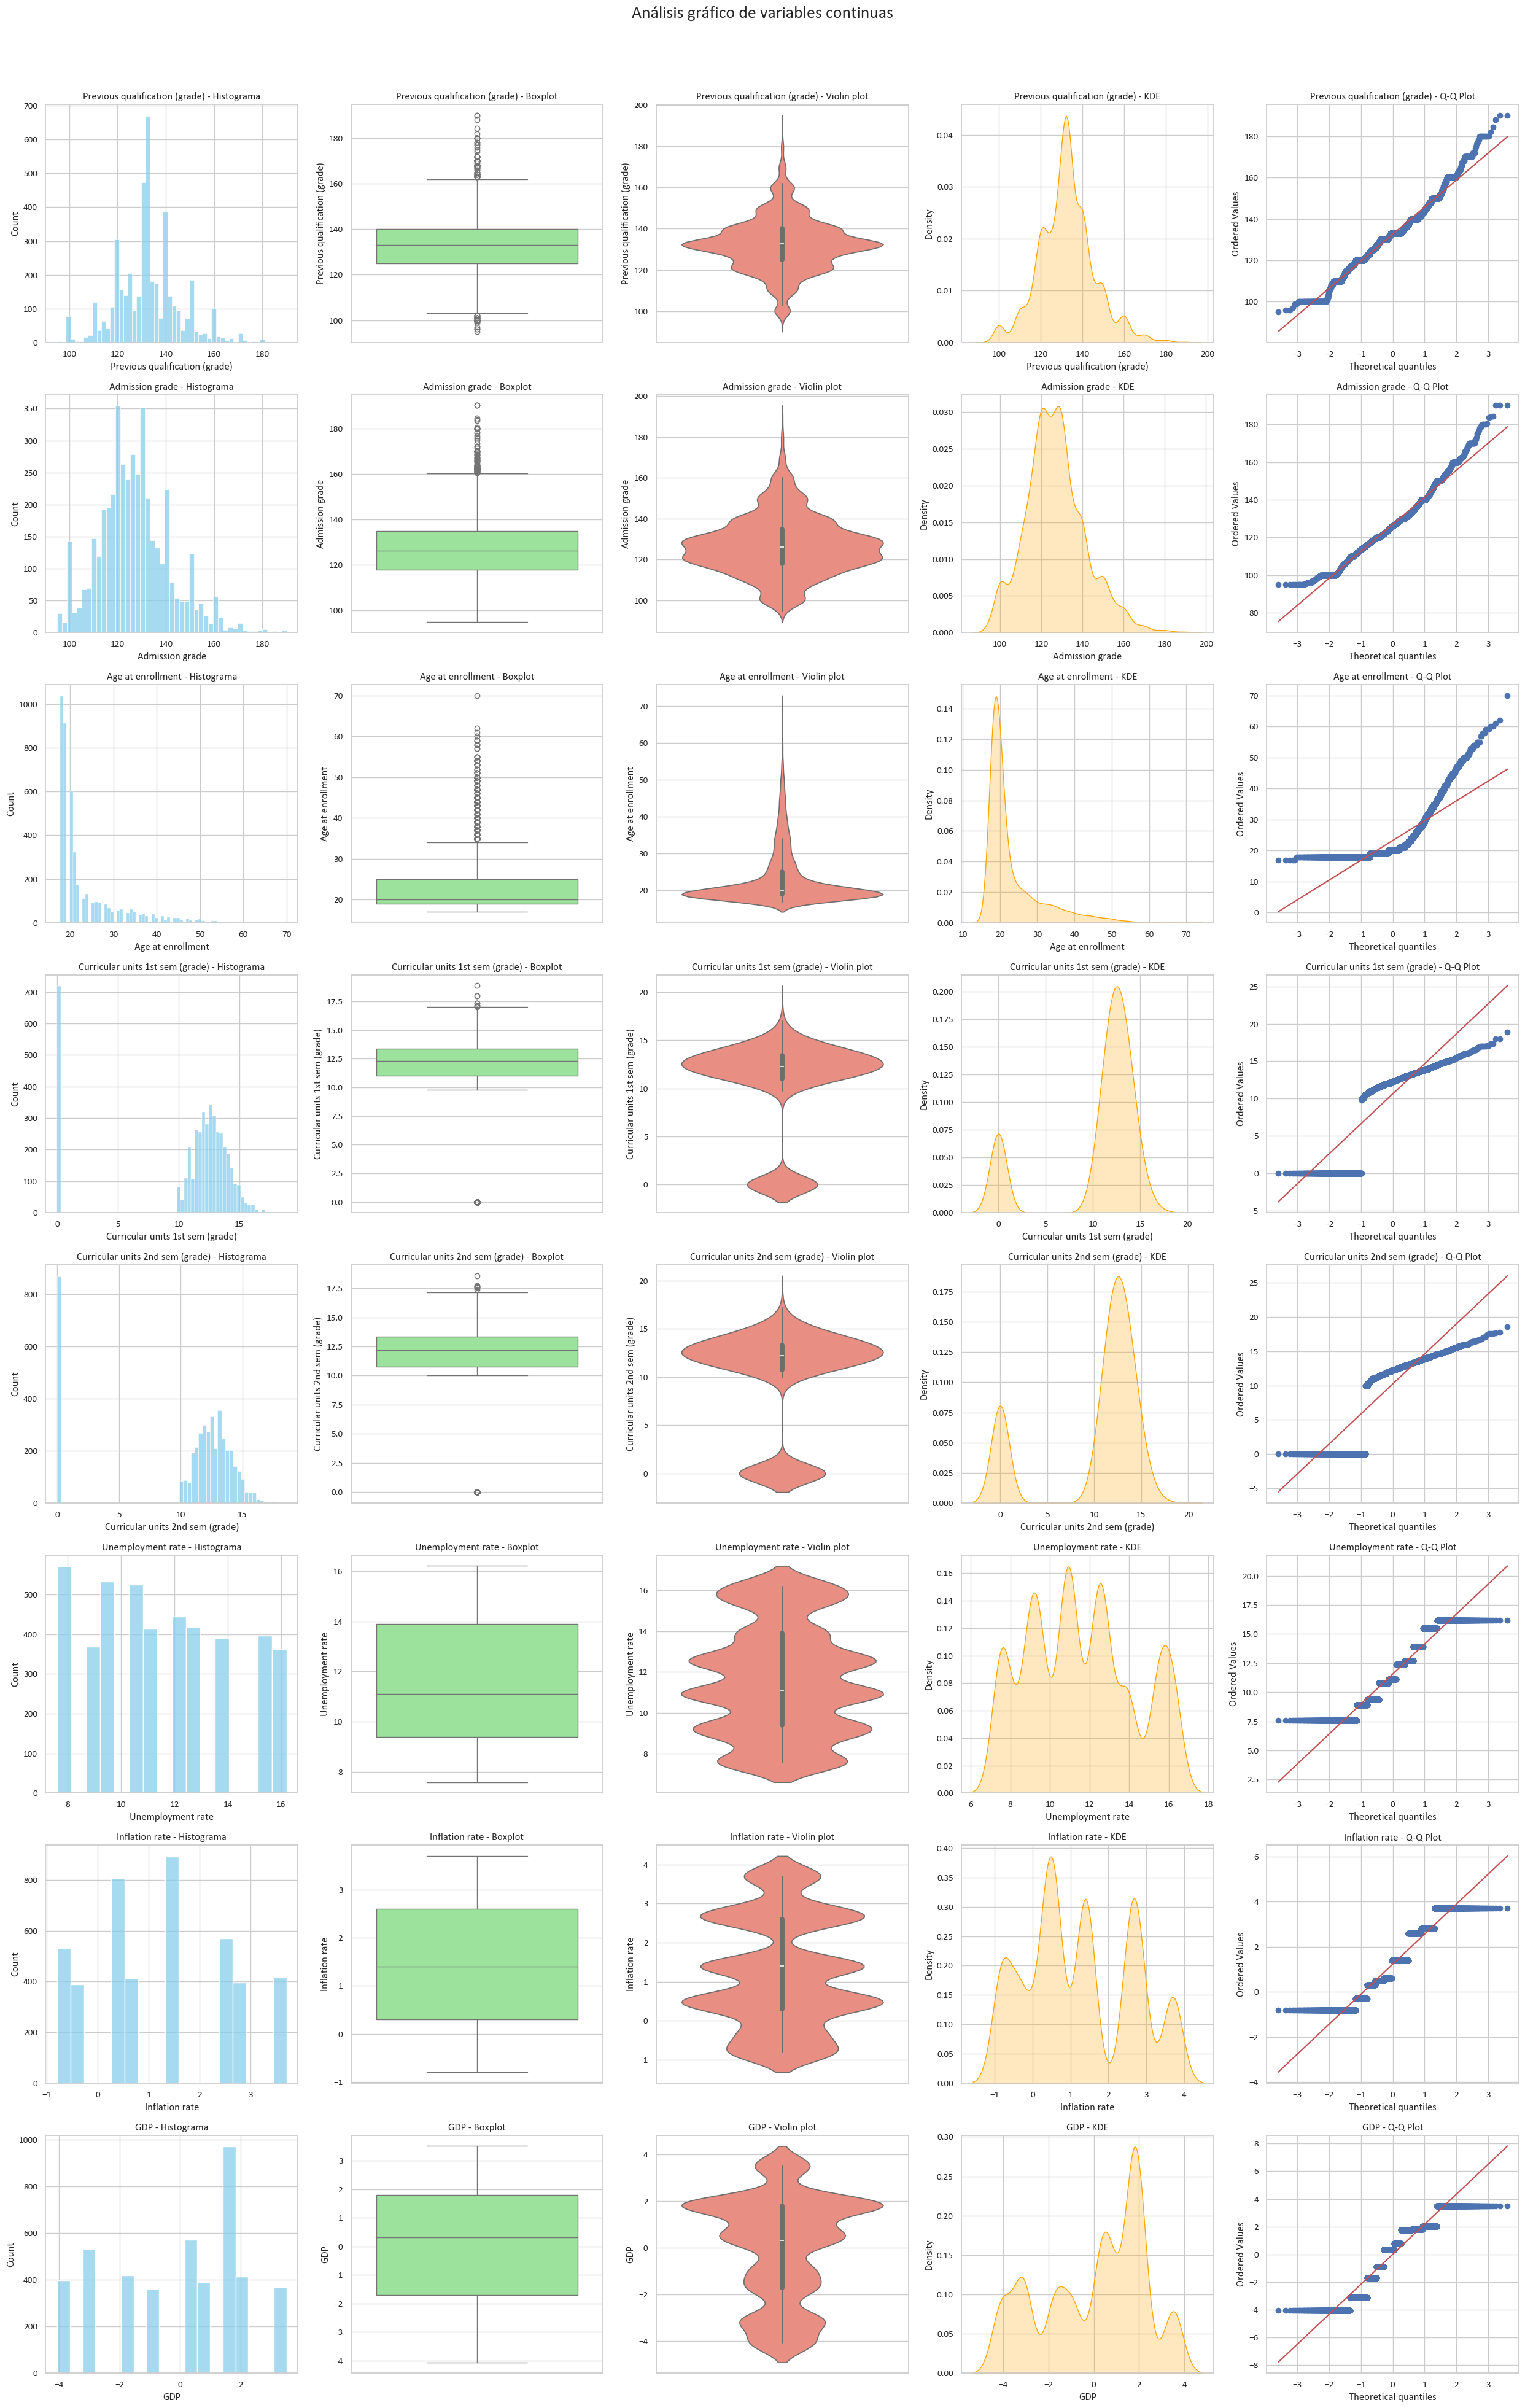

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Asegurar que las columnas sean numéricas
Var_Cont = Var_Cont.apply(pd.to_numeric, errors='coerce')

# Configurar el estilo
sns.set(style="whitegrid", font="Calibri", font_scale=1.0)

# Crear figura
num_vars = len(Var_Cont.columns)
fig, axs = plt.subplots(num_vars, 5, figsize=(25, 5 * num_vars))
fig.suptitle("Análisis gráfico de variables continuas", fontsize=20)

for i, col in enumerate(Var_Cont.columns):
    # Histograma
    sns.histplot(Var_Cont[col], kde=False, ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f'{col} - Histograma')

    # Boxplot
    sns.boxplot(y=Var_Cont[col], ax=axs[i, 1], color='lightgreen')
    axs[i, 1].set_title(f'{col} - Boxplot')

    # Violin plot
    sns.violinplot(y=Var_Cont[col], ax=axs[i, 2], color='salmon')
    axs[i, 2].set_title(f'{col} - Violin plot')

    # KDE
    sns.kdeplot(data=Var_Cont[col].dropna(), fill=True, ax=axs[i, 3], color='orange')
    axs[i, 3].set_title(f'{col} - KDE')

    # Q-Q Plot
    probplot(Var_Cont[col].dropna(), dist="norm", plot=axs[i, 4])
    axs[i, 4].set_title(f'{col} - Q-Q Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

A continuacion, se llevó a cabo un análisis de correlación utilizando el coeficiente de Spearman, cuyos resultados se presentan en la Figura presentada en la parte posterior. Este método no paramétrico fue seleccionado debido a la no normalidad detectada en algunas variables del conjunto de datos, garantizando así una medición robusta de las relaciones monotónicas entre las variables continuas analizadas. Los resultados del análisis de correlación revelaron que las variables de rendimiento académico presentan asociaciones positivas entre sí. La correlación más alta se observó entre "Curricular units 1st sem (grade)" y "Curricular units 2nd sem (grade)" (ρ = 0.76), seguida por la correlación entre "Previous qualification (grade)" y "Admission grade" (ρ = 0.58). Las calificaciones previas mostraron correlaciones positivas bajas con el rendimiento curricular del primer semestre (ρ = 0.18) y segundo semestre (ρ = 0.15), mientras que las calificaciones de admisión presentaron correlaciones similares con ambos períodos curriculares (ρ = 0.21 y ρ = 0.19, respectivamente). La variable "Age at enrollment" exhibió correlaciones negativas bajas con todas las variables de rendimiento académico, siendo más pronunciadas con las calificaciones curriculares de ambos semestres (ρ = -0.21) comparadas con las calificaciones previas (ρ = -0.14) y de admisión (ρ = -0.10). En cuanto a las variables macroeconómicas, se identificó una correlación negativa baja entre "Unemployment rate" y "GDP" (ρ = -0.29), así como entre "Inflation rate" y "GDP" (ρ = -0.10). La correlación entre "Unemployment rate" e "Inflation rate" resultó prácticamente nula (ρ = -0.05). Las correlaciones entre variables académicas y macroeconómicas fueron consistentemente bajas, con valores absolutos que no superaron ρ = 0.11. Las correlaciones más altas en esta categoría se observaron entre "GDP" y las calificaciones curriculares del segundo semestre (ρ = 0.11) y primer semestre (ρ = 0.09). Las demás correlaciones entre estos dos grupos de variables oscilaron entre -0.07 y 0.05, indicando asociaciones prácticamente inexistentes. Estos resultados evidencian patrones de correlación diferenciados según el dominio de las variables, con asociaciones más fuertes dentro del ámbito académico y económico respectivamente, mientras que las correlaciones entre dominios diferentes resultaron negligibles.

</div>


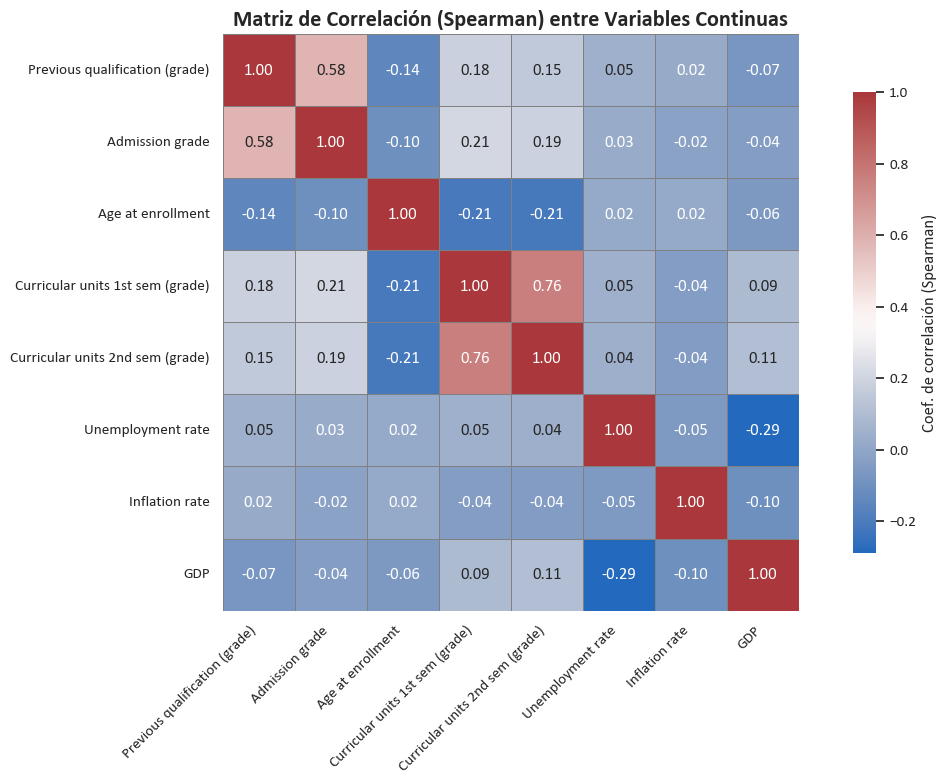

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general de seaborn
sns.set(style="whitegrid", font="Calibri", font_scale=1.0)

# Calcular matriz de correlación usando Spearman
corr_matrix = Var_Cont.corr(method='spearman')

# Crear figura
plt.figure(figsize=(12, 8))

# Mapa de calor con opciones estéticas
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Coef. de correlación (Spearman)"}
)

# Título y ajustes
plt.title("Matriz de Correlación (Spearman) entre Variables Continuas", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">
 En segundo lugar, se procedió con el estudio del comportamiento del grupo de variables Cuantitativas Discretas, para este caso se desarrollo un resumen estadistico de medidas asimetria, de dispersion, tendencia central, y analisis de correlación.

</div>


In [9]:
vars_discretas = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Application order'
]

# Crear el DataFrame con las variables discretas
Var_Disc = df[vars_discretas]
Var_Disc

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),Application order
0,0,0,0,0,0,0,0,0,0,0,5
1,0,6,6,6,0,0,6,6,6,0,1
2,0,6,0,0,0,0,6,0,0,0,5
3,0,6,8,6,0,0,6,10,5,0,2
4,0,6,9,5,0,0,6,6,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4419,0,6,7,5,0,0,6,8,5,0,6
4420,0,6,6,6,0,0,6,6,2,0,2
4421,0,7,8,7,0,0,8,9,1,0,1
4422,0,5,5,5,0,0,5,6,5,0,1


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Se encontró que las variables de unidades acreditadas (credited) en ambos semestres (uno y dos) presentan medias de (0.710 y 0.542) con desviaciones estándar que superan las medias (2.361 y 1.919), resultando en coeficientes de variación mayores a uno (3.325 y 3.541), lo cual indica alta dispersión y distribuciones con asimetrías positivas pronunciadas (4.169 y 4.635) y curtosis elevadas (19.206 y 24.427), sugiriendo distribuciones leptocúrticas con colas derechas largas. La concentración masiva de valores en cero (como evidencian las medianas de 0.0) indica que la mayoría de estudiantes no tienen unidades acreditadas.

Las variables de unidades inscritas (enrolled) muestran un comportamiento contrastante, con medias de (6.271 y 6.232) y coeficientes de variación bajos (0.396 y 0.352), indicando estabilidad y homogeneidad en la carga académica estudiantil. Sus asimetrías positivas moderadas (1.619 y 0.788) y curtosis elevadas (8.938 y 7.135) sugieren distribuciones con concentración hacia valores centrales pero con colas derechas extendidas. Las medianas de 6.0 para ambos semestres confirman una carga académica típica, mientras que los valores máximos (26 y 23 unidades) revelan casos excepcionales de estudiantes con cargas académicas intensivas.

Las variables de evaluaciones y aprobaciones presentan características intermedias que reflejan el proceso de progreso académico. Las unidades evaluadas muestran medias de 8.299 y 8.063 para primer y segundo semestre respectivamente, con coeficientes de variación moderados (0.504 y 0.490) y asimetrías positivas cercanas a 1.0, indicando distribuciones moderadamente asimétricas. Las unidades aprobadas exhiben medias ligeramente menores (4.707 y 4.436) con distribuciones más simétricas (asimetrías de 0.766 y 0.306), sugiriendo que aproximadamente la mitad de las unidades evaluadas resultan en aprobación. La diferencia entre unidades evaluadas y aprobadas proporciona información valiosa sobre las tasas de éxito académico y potencial riesgo de deserción.

Las variables de unidades sin evaluación revelan comportamientos extremos similares a las unidades acreditadas, con medias muy bajas (0.138 y 0.150), coeficientes de variación excepcionalmente altos (5.019 y 5.015) y asimetrías extremas (8.207 y 7.268).

Finalmente, la variable Application order presenta una distribución equilibrada (media = 1.728, mediana = 1.0) con asimetría positiva moderada (1.881). Los comportamientos de asimetría se pueden observar de igual manera en los gráficos de histogramas y KDE que se construyeron para cada variable a continuación. Dadas las asimetrías elevadas observadas, se advierte que los datos no siguen una distribución normal, lo cual es crucial para la selección de técnicas estadísticas adecuadas en futuros análisis.
</div>

In [10]:
# Crear el resumen estadístico personalizado
resumen1 = pd.DataFrame(index=Var_Disc.columns)

resumen1['Media'] = Var_Disc.mean()
resumen1['Desviación'] = Var_Disc.std()
resumen1['Mediana'] = Var_Disc.median()
resumen1['RI'] = Var_Disc.quantile(0.75) - Var_Disc.quantile(0.25)
resumen1['CV'] = resumen1['Desviación'] / resumen1['Media']
resumen1['Mínimo'] = Var_Disc.min()
resumen1['Máximo'] = Var_Disc.max()
resumen1['Asimetría'] = Var_Disc.skew()
resumen1['Curtosis'] = Var_Disc.kurtosis()
resumen1['P1'] = Var_Disc.quantile(0.01)
resumen1['P5'] = Var_Disc.quantile(0.05)
resumen1['P95'] = Var_Disc.quantile(0.95)
resumen1['P99'] = Var_Disc.quantile(0.99)

# Redondear a 3 decimales
resumen1 = resumen1.round(3)

# Mostrar el resumen redondeado
display(resumen1)


,Media,Desviación,Mediana,RI,CV,Mínimo,Máximo,Asimetría,Curtosis,P1,P5,P95,P99
Curricular units 1st sem (credited),0.710,2.361,0.0,0.0,3.325,0,20,4.169,19.206,0.0,0.0,6.0,13.00
Curricular units 1st sem (enrolled),6.271,2.480,6.0,2.0,0.396,0,26,1.619,8.938,0.0,4.0,11.0,17.00
Curricular units 1st sem (evaluations),8.299,4.179,8.0,4.0,0.504,0,45,0.977,5.463,0.0,0.0,15.0,21.00
Curricular units 1st sem (approved),4.707,3.094,5.0,3.0,0.657,0,26,0.766,3.097,0.0,0.0,9.0,15.00
Curricular units 1st sem (without evaluations),0.138,0.691,0.0,0.0,5.019,0,12,8.207,89.863,0.0,0.0,1.0,3.00
Curricular units 2nd sem (credited),0.542,1.919,0.0,0.0,3.541,0,19,4.635,24.427,0.0,0.0,4.0,11.00
Curricular units 2nd sem (enrolled),6.232,2.196,6.0,2.0,0.352,0,23,0.788,7.135,0.0,5.0,10.0,13.77
Curricular units 2nd sem (evaluations),8.063,3.948,8.0,4.0,0.490,0,33,0.336,2.068,0.0,0.0,15.0,19.00
Curricular units 2nd sem (approved),4.436,3.015,5.0,4.0,0.680,0,20,0.306,0.845,0.0,0.0,8.0,12.00
Curricular units 2nd sem (without evaluations),0.150,0.754,0.0,0.0,5.015,0,12,7.268,66.812,0.0,0.0,1.0,4.00


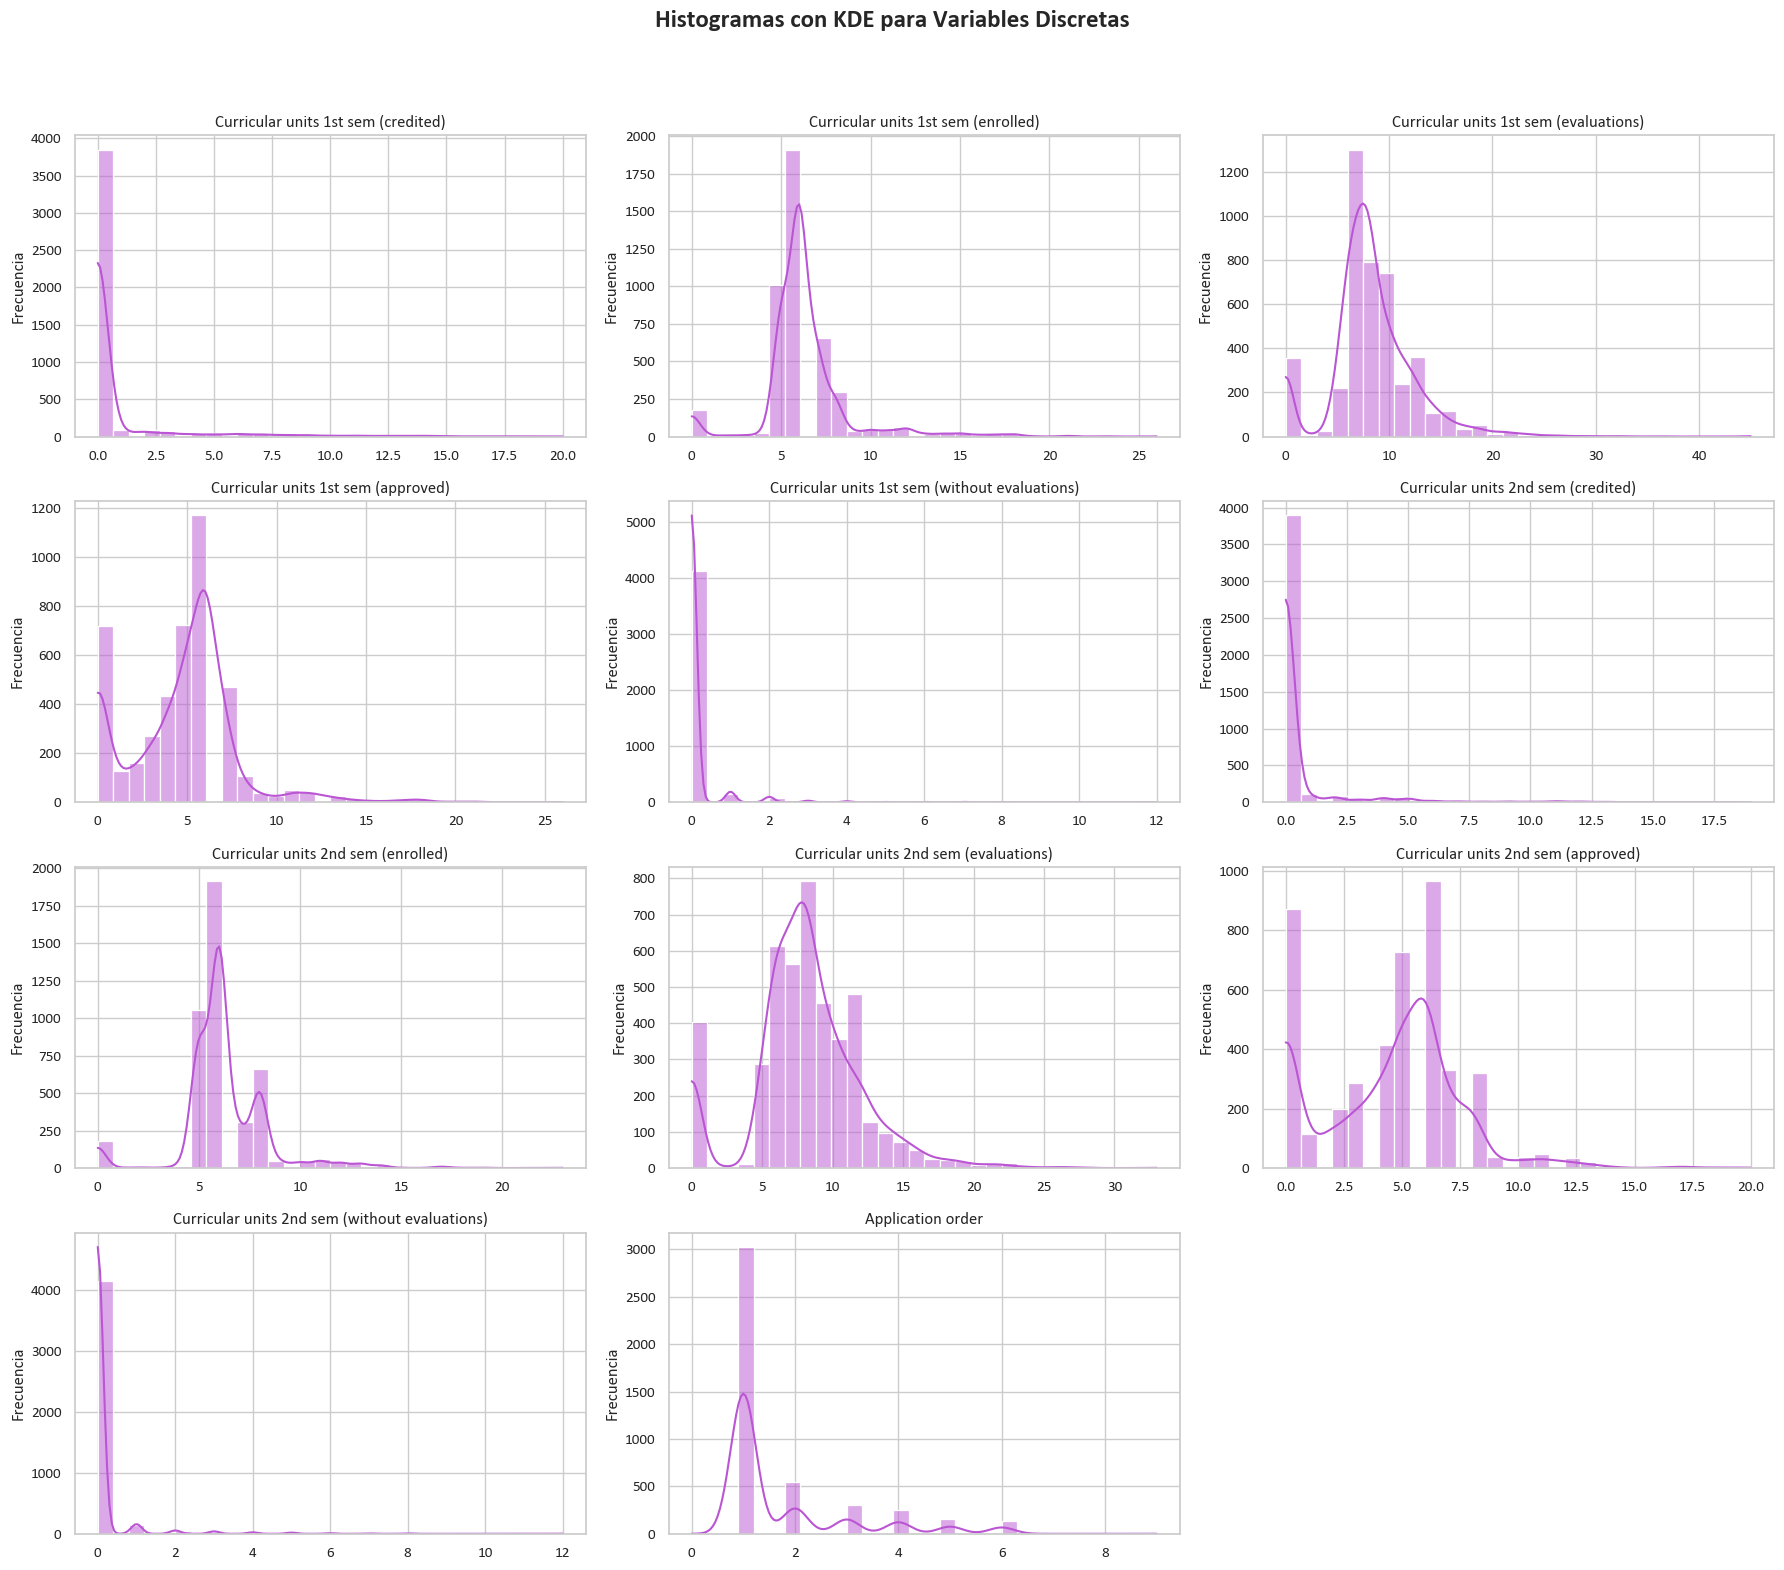

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de variables
n = len(Var_Disc.columns)

# Calcular número de filas y columnas para el grid
n_cols = 3
n_rows = math.ceil(n / n_cols)

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle("Histogramas con KDE para Variables Discretas", fontsize=18, fontweight='bold')

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar cada variable
for i, col in enumerate(Var_Disc.columns):
    sns.histplot(Var_Disc[col], kde=True, bins=30, color='mediumorchid', ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos (si hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">
La matriz de correlación revela patrones de asociación muy específicos entre las variables académicas analizadas. Las correlaciones más fuertes se observan entre variables del mismo tipo dentro de cada semestre, destacando correlaciones superiores a 0.90 entre unidades acreditadas y matriculadas tanto en primer semestre (r = 0.91) como en segundo semestre (r = 0.96). Similarmente, se presentan correlaciones muy altas entre unidades matriculadas y evaluaciones (r = 0.96 en primer semestre y r = 1.00 en segundo semestre), así como entre evaluaciones y aprobadas (r = 0.69 en primer semestre y r = 0.89 en segundo semestre). Las correlaciones entre semestres para el mismo tipo de variable muestran valores moderados a altos, oscilando entre 0.32 y 0.44 para la mayoría de las categorías. Las variables sin evaluaciones presentan un comportamiento correlacional distintivo, mostrando asociaciones débiles o negativas con la mayoría de las demás variables, con valores que van desde -0.07 hasta 0.38. Particularmente, estas variables muestran correlaciones negativas consistentes con las unidades aprobadas (-0.07 en primer semestre y -0.05 en segundo semestre). La variable orden de aplicación exhibe correlaciones predominantemente negativas o muy débiles con todas las variables académicas, con valores que oscilan entre -0.20 y 0.11, siendo las correlaciones más negativas con las unidades acreditadas de ambos semestres (-0.20 en ambos casos). La matriz también revela que las correlaciones transversales entre diferentes tipos de variables tienden a ser moderadas, generalmente situándose en el rango de 0.25 a 0.71.

</div>


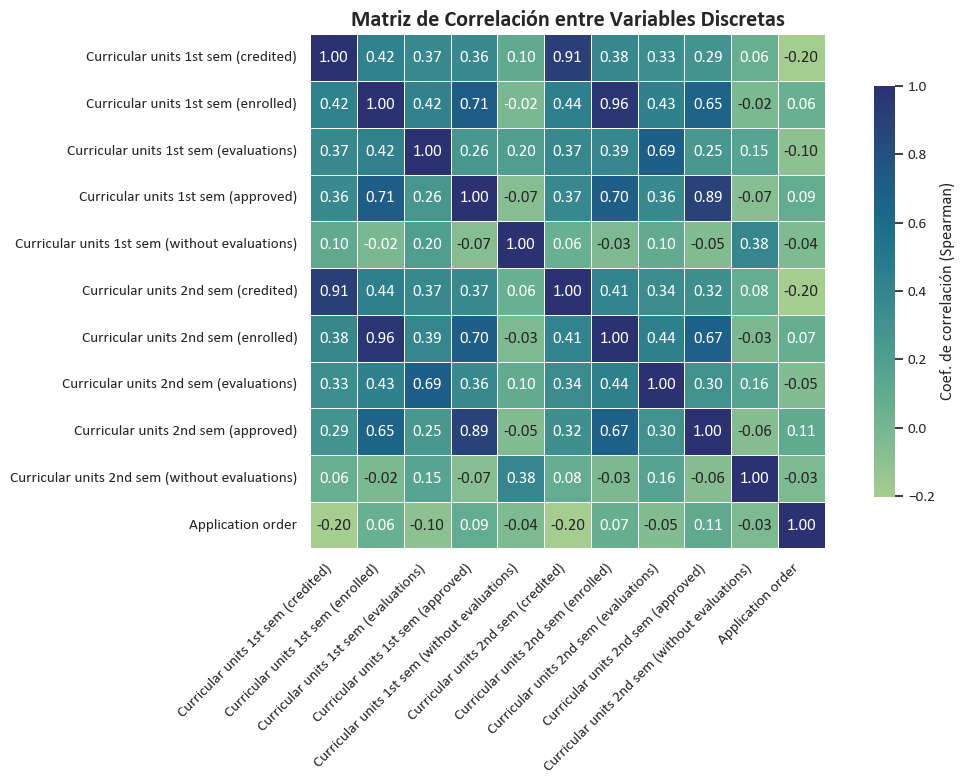

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación con Spearman (adecuado para discretas)
corr_matrix = Var_Disc.corr(method='spearman')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="crest",  # Visualmente suave
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Coef. de correlación (Spearman)"}
)
plt.title("Matriz de Correlación entre Variables Discretas", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Seguidamente, se llevo a cabo un analisis descriptivo para aquellas variables cualitativas numericas ordinales conformado por  "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation" y "Previous qualification"  a traves de tablas de frecuencias y graficos de barra. Los resultados se exponen  en los siguientes recuadros:

</div>

In [13]:
vars_ordinales = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Previous qualification"
]

Var_Ord = df[vars_ordinales]
Var_Ord

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Previous qualification
0,19,12,5,9,1
1,1,3,3,3,1
2,37,37,9,9,1
3,38,37,5,3,1
4,37,38,9,9,1
...,...,...,...,...,...
4419,1,1,5,4,1
4420,1,1,9,9,1
4421,37,37,9,9,1
4422,37,37,7,4,1


In [14]:
import pandas as pd

vars_ordinales = [
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Previous qualification"
]

# Lista para guardar los resultados
resumen = []

for var in vars_ordinales:
    frecuencias = df[var].value_counts()

    mas_frec_cat = frecuencias.idxmax()
    mas_frec_val = frecuencias.max()

    menos_frec_cat = frecuencias.idxmin()
    menos_frec_val = frecuencias.min()

    resumen.append({
        "Variable": var,
        "Categoría más frecuente": mas_frec_cat,
        "Valor 1 ": mas_frec_val,
        "Categoría menos frecuente": menos_frec_cat,
        "Valor 2 ": menos_frec_val
    })

# Crear DataFrame resumen
tabla_resumen_frecuencias = pd.DataFrame(resumen)

# Mostrar tabla
tabla_resumen_frecuencias

,Variable,Categoría más frecuente,Valor 1,Categoría menos frecuente,Valor 2
0,Mother's qualification,1,1069,18,1
1,Father's qualification,37,1209,20,1
2,Mother's occupation,9,1577,125,1
3,Father's occupation,9,1010,124,1
4,Previous qualification,1,3717,5,1


In [15]:
for col in Var_Ord:
    print(f"\n📌 Tabla de frecuencias para: {col}")

    # Crear tabla con frecuencia absoluta y relativa
    tabla_frecuencias = Var_Ord[col].value_counts(dropna=False).reset_index()
    tabla_frecuencias.columns = [col, "Frecuencia absoluta"]
    tabla_frecuencias["Frecuencia relativa (%)"] = (
        tabla_frecuencias["Frecuencia absoluta"] / tabla_frecuencias["Frecuencia absoluta"].sum() * 100
    )

    # Mostrar tabla con formato estilo
    display(
        tabla_frecuencias.style
        .format({
            "Frecuencia absoluta": "{:,.0f}",
            "Frecuencia relativa (%)": "{:.2f}"
        })
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .background_gradient(subset=["Frecuencia relativa (%)"], cmap='Blues')
        .hide(axis="index")
    )


📌 Tabla de frecuencias para: Mother's qualification


Mother's qualification,Frecuencia absoluta,Frecuencia relativa (%)
1,"1,069",24.16
37,"1,009",22.81
19,953,21.54
38,562,12.70
3,438,9.90
34,130,2.94
2,83,1.88
4,49,1.11
12,42,0.95
5,21,0.47



📌 Tabla de frecuencias para: Father's qualification


Father's qualification,Frecuencia absoluta,Frecuencia relativa (%)
37,"1,209",27.33
19,968,21.88
1,904,20.43
38,702,15.87
3,282,6.37
34,112,2.53
2,68,1.54
4,39,0.88
12,38,0.86
39,20,0.45



📌 Tabla de frecuencias para: Mother's occupation


Mother's occupation,Frecuencia absoluta,Frecuencia relativa (%)
9,"1,577",35.65
4,817,18.47
5,530,11.98
3,351,7.93
2,318,7.19
7,272,6.15
0,144,3.25
1,102,2.31
6,91,2.06
90,70,1.58



📌 Tabla de frecuencias para: Father's occupation


Father's occupation,Frecuencia absoluta,Frecuencia relativa (%)
9,"1,010",22.83
7,666,15.05
5,516,11.66
4,386,8.73
3,384,8.68
8,318,7.19
10,266,6.01
6,242,5.47
2,197,4.45
1,134,3.03



📌 Tabla de frecuencias para: Previous qualification


Previous qualification,Frecuencia absoluta,Frecuencia relativa (%)
1,"3,717",84.02
39,219,4.95
19,162,3.66
3,126,2.85
12,45,1.02
40,40,0.90
42,36,0.81
2,23,0.52
6,16,0.36
9,11,0.25


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">
El análisis de frecuencias de las variables de cualificación parental revela distribuciones asimétricas con concentraciones diferenciadas en categorías específicas. Para la cualificación materna, se observa una distribución trimodal con picos principales en las categorías 1 (24.16 %), 37 (22.81 %) y 19 (21.54 %), correspondientes respectivamente a educación secundaria (12.º año), educación básica (1.º ciclo) y educación básica (3.º ciclo). La cualificación paterna presenta un patrón similar pero con mayor concentración en las categorías intermedias, donde la categoría 37 representa el 27.33 % de los casos, seguida por la categoría 19 con 21.88 % y la categoría 1 con 20.43 %. Esta distribución evidencia una ligera tendencia hacia niveles educativos superiores en los padres comparado con las madres, particularmente en la categoría de educación básica de primer ciclo. Las variables ocupacionales muestran patrones de concentración marcadamente diferentes entre progenitores. La ocupación materna presenta una distribución altamente concentrada en la categoría 9 (trabajadores no cualificados) con 35.65 % de los casos, seguida por la categoría 4 (personal administrativo) con 18.47 % y la categoría 5 (trabajadores de servicios) con 11.98 %. En contraste, la ocupación paterna exhibe una distribución más equilibrada, aunque mantiene la categoría 9 como predominante con 22.83 %, seguida por la categoría 7 (trabajadores cualificados) con 15.05 % y la categoría 5 con 11.66 %. La comparación entre ambas variables ocupacionales revela una mayor diversificación ocupacional en los padres, con representación más distribuida entre categorías de trabajadores cualificados y técnicos, mientras que las madres muestran una concentración más pronunciada en ocupaciones no cualificadas y de servicios.

La variable de cualificación previa del estudiante presenta una distribución extremadamente asimétrica, con una concentración abrumadora en la categoría 1 (educación secundaria - 12.º año) que representa el 84.02 % de los casos. Las categorías subsiguientes muestran frecuencias considerablemente menores: categoría 39 (4.95 %), categoría 19 (3.66 %) y categoría 3 (2.85 %), correspondientes a diferentes niveles de educación superior y técnica. Esta distribución indica que la gran mayoría de estudiantes acceden al sistema educativo superior con antecedentes de educación secundaria completa, mientras que una proporción minoritaria ingresa con cualificaciones técnicas o superiores previas. La cola larga de la distribución, con múltiples categorías representando menos del 1 % cada una, sugiere una diversidad limitada pero presente en los antecedentes educativos de acceso.


</div>

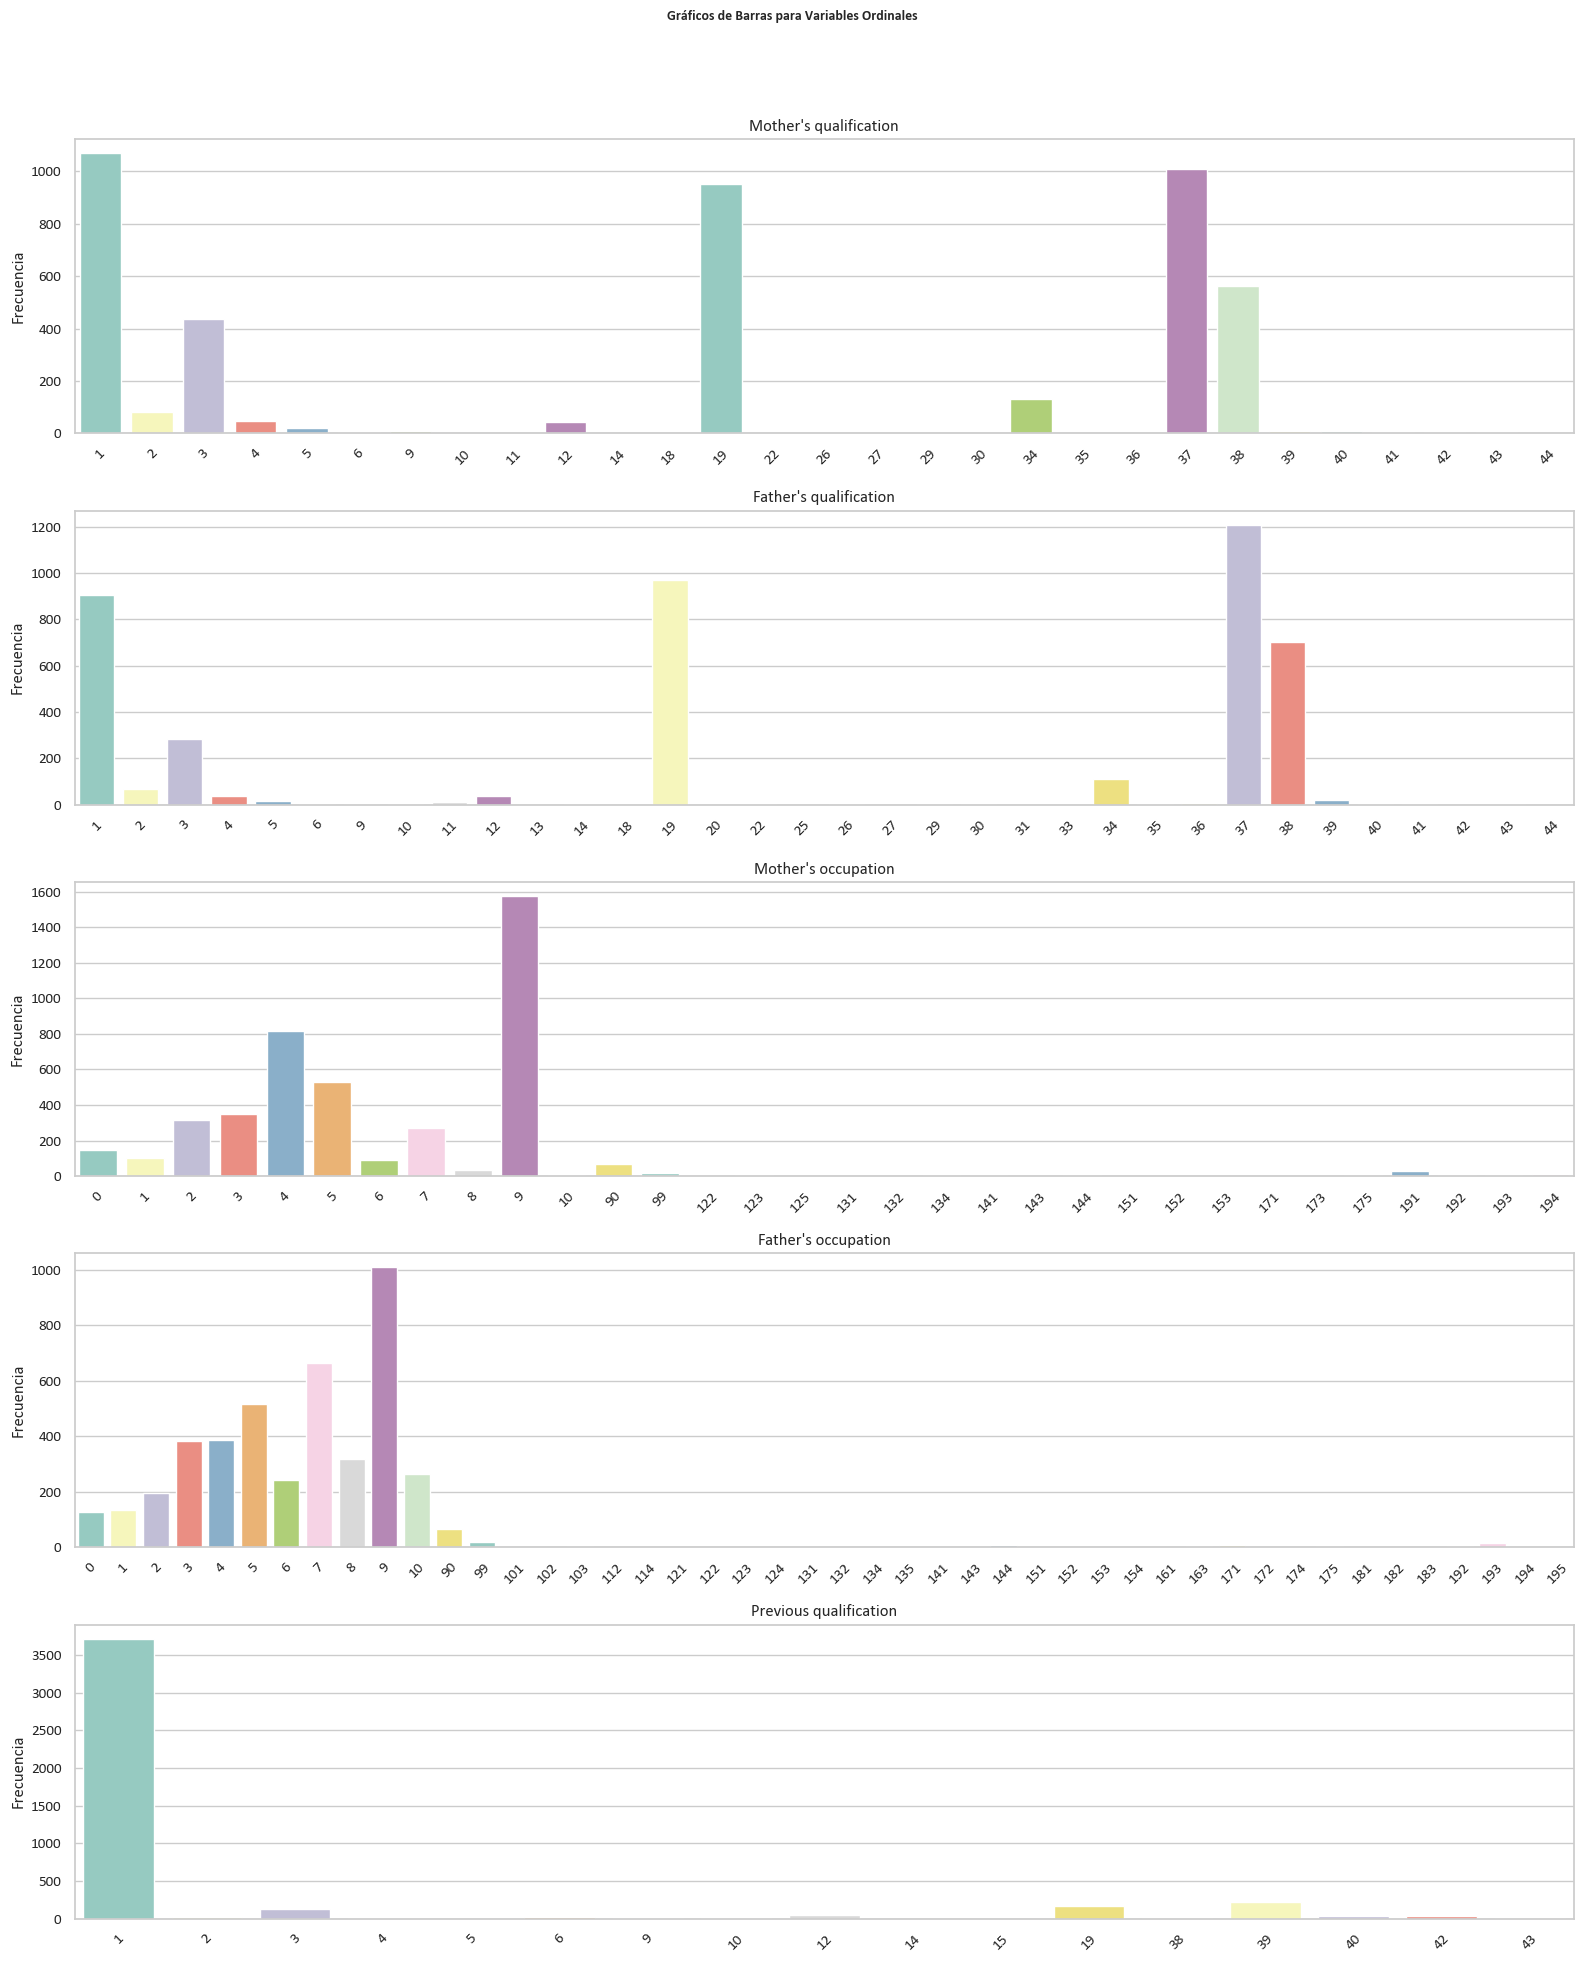

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de variables discretas
n = len(Var_Ord.columns)

# Configurar dimensiones del grid
n_cols = 1
n_rows = math.ceil(n / n_cols)

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
fig.suptitle("Gráficos de Barras para Variables Ordinales", fontsize=10, fontweight='bold')

# Aplanar los ejes
axes = axes.flatten()

# Graficar cada variable con countplot
for i, col in enumerate(Var_Ord.columns):
    sns.countplot(data=Var_Ord, x=col, hue=col, palette="Set3", legend=False, ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [17]:
# Eliminar espacios y caracteres invisibles (como \t) de todos los nombres de columnas
df.columns = df.columns.str.strip()


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Respecto al grupo de variables binarias conformado por    "Educational special needs","Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International", "Daytime/evening attendance", "Displaced"se contruyeron de igual manera  tanto tablas de frecuencia como grafico de barras, los resultados se presentan acontinuación:

</div>


In [18]:
# Lista de variables binarias con nombres corregidos
vars_binarias = [
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Daytime/evening attendance",
    "Displaced"
]

# Crear DataFrame con esas variables
Var_Bin = df[vars_binarias]

# Mostrar para verificar
Var_Bin.head()


,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Daytime/evening attendance,Displaced
0,0,0,1,1,0,0,1,1
1,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,1,1
3,0,0,1,0,0,0,1,1
4,0,0,1,0,0,0,0,0



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Basándose en el análisis descriptivo de las variables categóricas binarias presentadas, se observan patrones distintivos en la distribución de las características de la población estudiantil. Las variables relacionadas con necesidades educativas especiales, deudas académicas y cuotas de matrícula al día muestran una distribución marcadamente asimétrica, donde la categoría "no" (valor 0) representa la gran mayoría de los casos. Específicamente, el 98.85% de los estudiantes no presenta necesidades educativas especiales, el 88.63% no tiene deudas pendientes, y el 88.07% mantiene sus cuotas de matrícula al día. Esta tendencia sugiere que la población estudiantil analizada se caracteriza predominantemente por un perfil académico y financiero regular.

La distribución por género revela una composición relativamente equilibrada pero con ligero sesgo hacia la población femenina, representando el 64.83% del total (valor 0), mientras que la población masculina constituye el 35.17% (valor 1). En contraste, las variables relacionadas con becas y origen internacional presentan distribuciones altamente concentradas en una sola categoría. Los estudiantes sin beca representan el 75.16% de la población, mientras que solo el 24.84% posee algún tipo de beca. De manera más pronunciada, el 97.51% de los estudiantes son de origen nacional, con únicamente el 2.49% clasificados como estudiantes internacionales, evidenciando una composición predominantemente local en la institución.

La modalidad de asistencia y el estado de desplazamiento presentan patrones contrastantes que merecen análisis diferenciado. La asistencia diurna/vespertina (valor 1) domina claramente con el 89.08% de los estudiantes, dejando solo el 10.92% en otras modalidades horarias. Por el contrario, la variable de desplazamiento muestra una distribución más balanceada, aunque con tendencia hacia la población desplazada, que representa el 54.84% del total, frente al 45.16% de estudiantes no desplazados. Esta última variable es la única que presenta una distribución cercana al equilibrio, sugiriendo que el desplazamiento constituye una característica relevante en aproximadamente la mitad de la población estudiantil analizada.

</div>


In [19]:
Var_Bin = df[vars_binarias]

# Crear una tabla resumen vacía
tabla_frecuencias = pd.DataFrame()

# Recorrer cada variable para calcular frecuencias
for col in Var_Bin.columns:
    freq_abs = Var_Bin[col].value_counts(dropna=False)
    freq_rel = Var_Bin[col].value_counts(normalize=True, dropna=False) * 100
    tabla = pd.DataFrame({
        "Variable": col,
        "Valor": freq_abs.index,
        "Frecuencia absoluta": freq_abs.values,
        "Frecuencia relativa (%)": freq_rel.round(2).values
    })
    tabla_frecuencias = pd.concat([tabla_frecuencias, tabla], ignore_index=True)

# Mostrar la tabla final
#print(tabla_frecuencias.to_string(index=False))
tabla_frecuencias.style \
    .format({
        "Frecuencia absoluta": "{:,.0f}",
        "Frecuencia relativa (%)": "{:.2f}"
    }) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
    .background_gradient(subset=["Frecuencia relativa (%)"], cmap='Blues') \
    .hide(axis="index")


Variable,Valor,Frecuencia absoluta,Frecuencia relativa (%)
Educational special needs,0,"4,373",98.85
Educational special needs,1,51,1.15
Debtor,0,"3,921",88.63
Debtor,1,503,11.37
Tuition fees up to date,1,"3,896",88.07
Tuition fees up to date,0,528,11.93
Gender,0,"2,868",64.83
Gender,1,"1,556",35.17
Scholarship holder,0,"3,325",75.16
Scholarship holder,1,"1,099",24.84


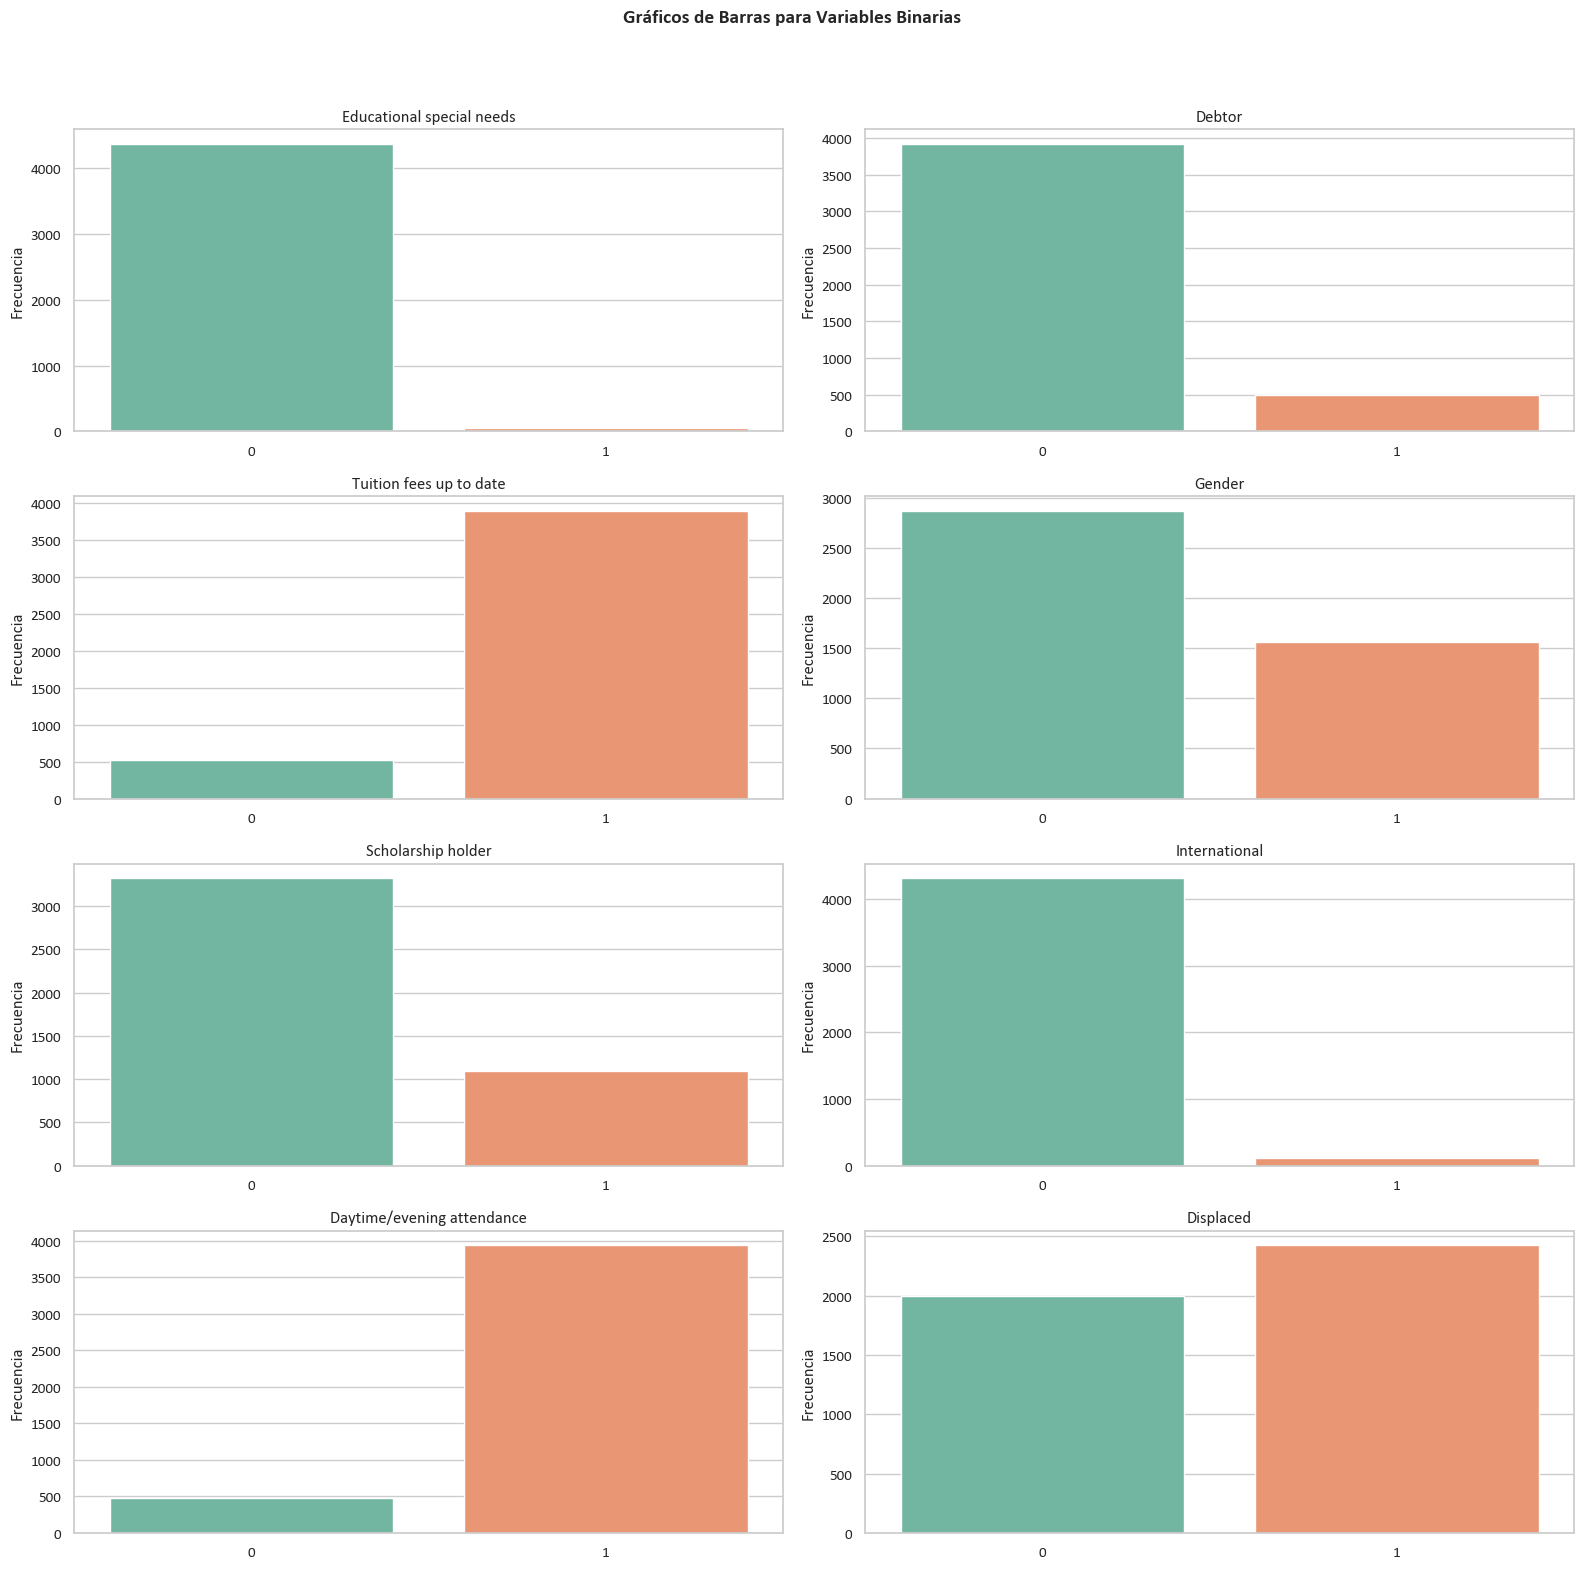

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de variables binarias
n = len(Var_Bin.columns)

# Configurar dimensiones del grid
n_cols = 2
n_rows = math.ceil(n / n_cols)

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
fig.suptitle("Gráficos de Barras para Variables Binarias", fontsize=14, fontweight='bold')

# Aplanar los ejes
axes = axes.flatten()

# Graficar cada variable con countplot
for i, col in enumerate(Var_Bin.columns):
    sns.countplot(data=Var_Bin, x=col, hue=col, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=0)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Por ultimo tenemos el grupo de variables numericas nominales por: 'Marital status', 'Application mode', 'Course', 'Target', 'Nacionality' se contruyeron de igual manera  tanto tablas de frecuencia como grafico de barras, los resultados se presentan acontinuación:



</div>


In [21]:
# Lista de variables continuas según la imagen
vars_Nom = [
    'Marital status',
    'Application mode',
    'Course',
    'Target',
    'Nacionality'
]

# Crear nuevo DataFrame solo con las variables continuas
Var_Nominales = df[vars_Nom]

# Mostrar las primeras filas
Var_Nominales.head()
# Crear nuevo DataFrame solo con las variables continuas
Var_Nominales = df[vars_Nom]

# Mostrar las primeras filas
Var_Nominales.head()

,Marital status,Application mode,Course,Target,Nacionality
0,1,17,171,Dropout,1
1,1,15,9254,Graduate,1
2,1,1,9070,Dropout,1
3,1,17,9773,Graduate,1
4,2,39,8014,Graduate,1



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Basándose en el análisis descriptivo de las variables categóricas nominales presentadas, se observan patrones de concentración significativamente diferenciados entre las variables analizadas. La variable estado civil muestra una distribución altamente asimétrica, donde la categoría "soltero" (valor 1) domina con el 88.58% de la población estudiantil, seguida por "casado" (valor 2) con apenas el 8.57%. Las demás categorías matrimoniales presentan frecuencias marginales que no superan el 2.06%, evidenciando una composición predominantemente soltera en la población académica. Esta concentración contrasta marcadamente con la diversidad observada en otras variables del conjunto de datos.

La variable modalidad de aplicación presenta una distribución policategórica con mayor heterogeneidad, aunque mantiene un patrón de concentración en las primeras categorías. La modalidad "1ra fase - contingente general" (valor 1) representa el 38.61% de los casos, constituyendo la categoría modal, mientras que la "2da fase - contingente general" (valor 17) alcanza el 19.71%. La modalidad correspondiente a "estudiantes mayores de 23 años" (valor 39) representa el 17.74%, configurando las tres categorías principales que acumulan el 76.06% de la población total. Las restantes modalidades muestran frecuencias decrecientes, con catorce categorías adicionales que individualmente no superan el 7.05%, revelando una estructura de admisión concentrada en modalidades de acceso tradicionales.

El análisis de la distribución por programas académicos y variables de resultado académico evidencia patrones distintivos en la composición institucional. La variable curso muestra una distribución relativamente uniforme entre los programas más representativos, donde "Turismo" (código 9500) lidera con el 17.31%, seguido por "Equinicultura" (código 9147) con el 8.59% y "Gestión" (código 9238) con el 8.02%. La variable target, que clasifica el estado académico final, presenta una distribución más equilibrada con "graduados" representando el 49.93%, "desertores" el 32.12% y "matriculados activos" el 17.95%. La nacionalidad confirma el carácter predominantemente nacional de la institución, con el 97.51% de estudiantes portugueses (valor 1), mientras que las nacionalidades extranjeras presentan frecuencias marginales inferiores al 1%, siendo la más representativa la nacionalidad 41 con apenas el 0.86% del total.

</div>


In [22]:
for col in vars_Nom:
    print(f"\n📌 Tabla de frecuencias para: {col}")

    # Crear tabla con frecuencia absoluta y relativa
    tabla_frecuencias = Var_Nominales[col].value_counts(dropna=False).reset_index()
    tabla_frecuencias.columns = [col, "Frecuencia absoluta"]
    tabla_frecuencias["Frecuencia relativa (%)"] = (
        tabla_frecuencias["Frecuencia absoluta"] / tabla_frecuencias["Frecuencia absoluta"].sum() * 100
    )

    # Mostrar tabla con formato estilo
    display(
        tabla_frecuencias.style
        .format({
            "Frecuencia absoluta": "{:,.0f}",
            "Frecuencia relativa (%)": "{:.2f}"
        })
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .background_gradient(subset=["Frecuencia relativa (%)"], cmap='Blues')
        .hide(axis="index")
    )


📌 Tabla de frecuencias para: Marital status


Marital status,Frecuencia absoluta,Frecuencia relativa (%)
1,"3,919",88.58
2,379,8.57
4,91,2.06
5,25,0.57
6,6,0.14
3,4,0.09



📌 Tabla de frecuencias para: Application mode


Application mode,Frecuencia absoluta,Frecuencia relativa (%)
1,"1,708",38.61
17,872,19.71
39,785,17.74
43,312,7.05
44,213,4.81
7,139,3.14
18,124,2.80
42,77,1.74
51,59,1.33
16,38,0.86



📌 Tabla de frecuencias para: Course


Course,Frecuencia absoluta,Frecuencia relativa (%)
9500,766,17.31
9147,380,8.59
9238,355,8.02
9085,337,7.62
9773,331,7.48
9670,268,6.06
9991,268,6.06
9254,252,5.70
9070,226,5.11
171,215,4.86



📌 Tabla de frecuencias para: Target


Target,Frecuencia absoluta,Frecuencia relativa (%)
Graduate,"2,209",49.93
Dropout,"1,421",32.12
Enrolled,794,17.95



📌 Tabla de frecuencias para: Nacionality


Nacionality,Frecuencia absoluta,Frecuencia relativa (%)
1,"4,314",97.51
41,38,0.86
26,14,0.32
6,13,0.29
22,13,0.29
24,5,0.11
100,3,0.07
11,3,0.07
103,3,0.07
62,2,0.05


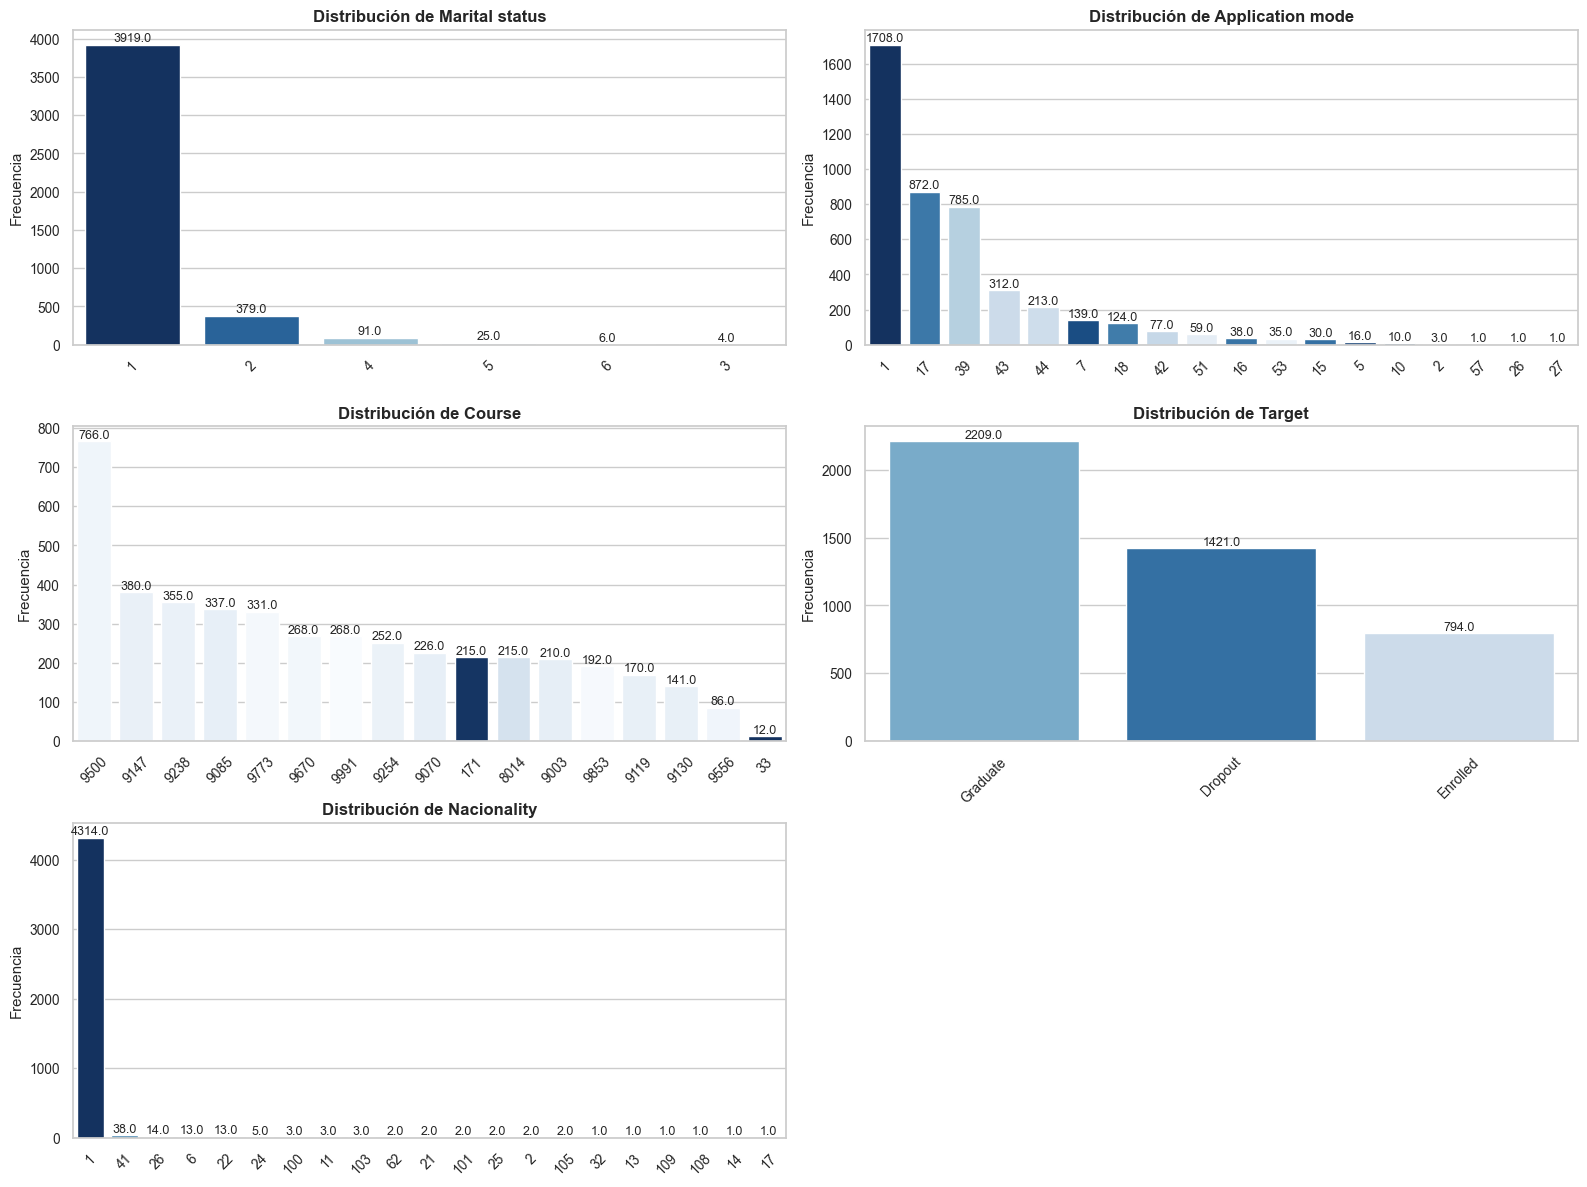

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables nominales
vars_Nom = [
    'Marital status',
    'Application mode',
    'Course',
    'Target',
    'Nacionality'
]

# Crear nuevo DataFrame con las variables nominales
Var_Nominales = df[vars_Nom]

# Configurar estilo
sns.set(style="whitegrid", font_scale=0.9)

# Crear figura con subplots (calcula filas según necesidad)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Graficar cada variable en su subplot
for i, col in enumerate(vars_Nom):
    ax = axes[i]
    sns.countplot(
        data=Var_Nominales,
        x=col,
        hue=col,  # Solución al warning
        order=Var_Nominales[col].value_counts().index,
        palette="Blues_r",
        ax=ax,
        legend=False  # Oculta leyenda duplicada
    )
    ax.set_title(f"Distribución de {col}", fontsize=12, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis='x', rotation=45)

    # Añadir etiquetas encima de las barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

# Eliminar subplots vacíos si hay más ejes que variables
if len(vars_Nom) < len(axes):
    for j in range(len(vars_Nom), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### **Modelos KNN**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">


</div>

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

**Preprocesamiento y División de Datos**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Antes de aplicar cualquier modelo, es fundamental transformar adecuadamente las variables. Para las numéricas se usó MinMaxScaler, que las normaliza en un rango de 0 a 1. Las variables categóricas se codificaron mediante OneHotEncoder, excluyendo la primera categoría para evitar colinealidad. Esto se integró en un ColumnTransformer, lo cual permitió aplicar ambos procesos en un solo paso dentro del pipeline general. Del mismo modo, se dividió el conjunto de datos en entrenamiento y prueba utilizando train_test_split. Se destinó un 20 % para la prueba, con random_state=66 para mantener la reproducibilidad. Esta separación nos permite evaluar de forma realista el desempeño de los modelos sobre datos no vistos.

</div>


In [25]:
df['abandona_binaria'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)
#separamos nuestras variables predictoras y objetivo
X = df.drop(['Target', 'abandona_binaria'], axis=1)
y = df['abandona_binaria']

# Identifica columnas categóricas y numéricas
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [26]:
# Dividir con estratificación
#X_train/y_train: datos para entrenar el modelo.
#X_test/y_test: datos para probar cómo predice en nuevos casos.
#El parámetro stratify asegura que la proporción de clases en ambos subconjuntos sea similar.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=66
)

In [27]:
# Configurar preprocesamiento ¿Qué hicimos? Definimos qué tratamiento necesita cada tipo de variable:

#MinMaxScaler normaliza las numéricas al rango [0,1].

#OneHotEncoder convierte cada categoría en una columna binaria.
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

#### **Aplicación KNN para Clasificación**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Se aplicó el algoritmo KNN para predecir la variable binaria abandona_binaria. Para evaluar el modelo, se calcularon las siguientes métricas clásicas:

- Matriz de confusión: muestra los aciertos y errores de clasificación.
- Accuracy, precision, recall y F1-score.
- Curva ROC + AUC para analizar la capacidad discriminativa del modelo.
- Analisis visual del impacto de distintos valores de k sobre la precisión del modelo.

</div>

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, confusion_matrix
# 🔁 Evaluar múltiples valores de K
# Se define y entrena el modelo con clf = Pipeline(steps=[
# ('preprocessing', preprocessor),
#('knn', KNeighborsClassifier(n_neighbors=n))])
#clf.fit(X_train, y_train)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for k in neighbors_settings:
    clf = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    clf.fit(X_train, y_train)

    # Predicciones
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Métricas
    acc = accuracy_score(y_test, test_pred)
    training_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(acc)

    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    balanced_acc = balanced_accuracy_score(y_test, test_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"K={k}")
    print(f"Accuracy: {acc:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1-score: {f1:.3f}")
    print(f"Balanced Accuracy: {balanced_acc:.3f} | ROC AUC: {roc_auc:.3f}")
    print(f"Matriz de confusión:\n{confusion_matrix(y_test, test_pred)}")
    print("-" * 50)

K=1
Accuracy: 0.808 | Precision: 0.714 | Recall: 0.669 | F1-score: 0.691
Balanced Accuracy: 0.771 | ROC AUC: 0.771
Matriz de confusión:
[[525  76]
 [ 94 190]]
--------------------------------------------------
K=2
Accuracy: 0.818 | Precision: 0.844 | Recall: 0.532 | F1-score: 0.652
Balanced Accuracy: 0.743 | ROC AUC: 0.817
Matriz de confusión:
[[573  28]
 [133 151]]
--------------------------------------------------
K=3
Accuracy: 0.832 | Precision: 0.782 | Recall: 0.658 | F1-score: 0.715
Balanced Accuracy: 0.786 | ROC AUC: 0.840
Matriz de confusión:
[[549  52]
 [ 97 187]]
--------------------------------------------------
K=4
Accuracy: 0.846 | Precision: 0.885 | Recall: 0.599 | F1-score: 0.714
Balanced Accuracy: 0.781 | ROC AUC: 0.854
Matriz de confusión:
[[579  22]
 [114 170]]
--------------------------------------------------
K=5
Accuracy: 0.852 | Precision: 0.849 | Recall: 0.655 | F1-score: 0.740
Balanced Accuracy: 0.800 | ROC AUC: 0.859
Matriz de confusión:
[[568  33]
 [ 98 186]]
-

**Análisis de Métricas y Comparación Entre Distintos Valores de K**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

##### *k entre 1 y 4*

Estos valores muestran un comportamiento enfocado en la sensibilidad del modelo, es decir, en identificar la clase positiva.

- En k = 1 se alcanza el Recall más alto (0.669), lo que indica buena detección de abandonos.
- Sin embargo, la Precision es más baja (0.714), lo que implica un mayor número de falsos positivos.
- El F1-score es moderado (0.691) y la ROC AUC no supera 0.771.

En general, este rango puede ser útil si se prioriza minimizar los falsos negativos, aunque con riesgo de sobreajuste.

##### *k entre 5 y 9*

Este grupo ofrece el mejor equilibrio global.

- En k = 5 se alcanzan los mejores valores de Accuracy (0.852), F1-score (0.740) y Balanced Accuracy (0.800).
- La matriz de confusión para k = 5 muestra una buena proporción entre verdaderos positivos y negativos, con 186 TP y 568 TN.
- El ROC AUC también es alto (0.859), indicando buen poder discriminativo.
- Otros valores cercanos, como k = 7 o k = 9, también muestran rendimiento competitivo.

Este rango es ideal si se busca un modelo con estabilidad y buen desempeño global en métricas clave.

##### *k entre 10 y 19*

En esta sección, los valores tienden a favorecer la clase negativa.

- La Precision aumenta significativamente, alcanzando hasta 0.921 en k = 18.
- Sin embargo, el Recall cae por debajo de 0.55, lo que implica omitir muchos casos de abandono.
- El F1-score disminuye y la matriz de confusión muestra un crecimiento en los falsos negativos (por ejemplo, 133 FN en k = 18).
- El ROC AUC se mantiene competitivo, llegando a 0.873 en k = 11 y k = 12.

Este bloque puede ser útil si la prioridad está en reducir las falsas alarmas, aunque a costa de detectar menos casos reales.

##### *Conclusión técnica*

El valor óptimo es k = 5, por su equilibrio entre todas las métricas:

- Accuracy: 0.852
- Precision: 0.849
- Recall: 0.655
- F1-score: 0.740
- Balanced Accuracy: 0.800
- ROC AUC: 0.859
- Matriz de confusión:
  - Verdaderos positivos (TP): 186
  - Verdaderos negativos (TN): 568
  - Falsos positivos (FP): 33
  - Falsos negativos (FN): 98

Este valor ofrece una buena relación entre sensibilidad y precisión, siendo confiable en contextos donde ambas métricas son relevantes.

</div>

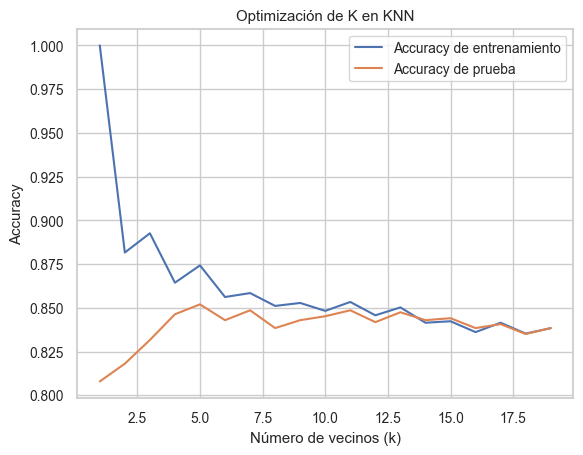

In [29]:
plt.plot(neighbors_settings, training_accuracy, label='Accuracy de entrenamiento')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy de prueba')
plt.ylabel('Accuracy')
plt.xlabel('Número de vecinos (k)')
plt.title('Optimización de K en KNN')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
print(y_train.value_counts())

abandona_binaria
0    2402
1    1137
Name: count, dtype: int64


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, test_pred)

**Curva ROC y AUC para K = 5**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">
Para k = 5, el modelo de clasificación KNN muestra un desempeño notable según la curva ROC, con un AUC de 0.87 que indica una capacidad sólida de discriminación entre estudiantes que abandonan y los que no. La curva se eleva significativamente por encima del clasificador aleatorio (línea diagonal), demostrando un buen balance entre sensibilidad y especificidad. Esto significa que el modelo tiene un 87 % de probabilidad de asignar correctamente una mayor probabilidad de abandono al estudiante que realmente abandonó. Complementado con la matriz de confusión—186 verdaderos positivos y 98 falsos negativos—se confirma que la mayoría de los casos positivos están siendo bien identificados, aunque aún hay espacio para mejorar el recall si se considera prioritario.
</div>


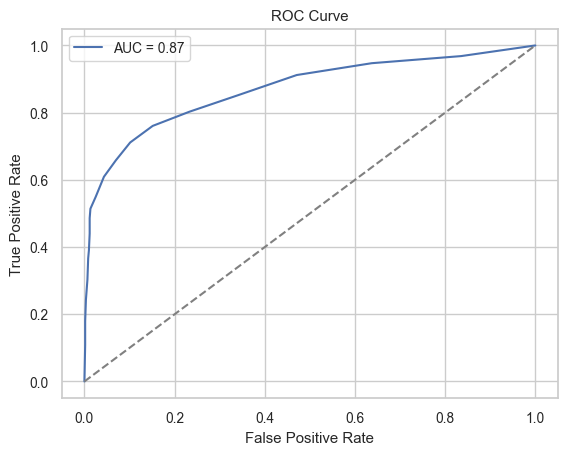

In [32]:
#Curva ROC y AUC
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades
y_proba = clf.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Graficar
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea base
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


#### **Aplicación KNN para regresión**

**KNN para Regresión**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Se inicia el modelo de regresión construyendo la variable objetivo promedio_final, que representa el promedio de rendimiento académico del estudiante en el primer y segundo semestre. Esta columna se calcula como la media de las variables 'Curricular units 1st sem (grade)' y 'Curricular units 2nd sem (grade)'. Para definir la matriz de características 'X' y el vector objetivo 'y', se eliminan las columnas relacionadas directamente con el abandono ('Target', 'abandona_binaria') y el promedio_final calculado. Luego, se depura nuevamente X eliminando explícitamente las columnas de calificaciones originales, lo que evita redundancias y garantiza que el modelo no tenga acceso directo a los valores que ya fueron combinados en la variable objetivo. Finalmente, se identifican las variables categóricas y numéricas para preparar el preprocesamiento del modelo.

</div>




In [33]:
df['promedio_final'] = df[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']].mean(axis=1)
X = df.drop(columns=['Target', 'abandona_binaria', 'promedio_final'])  # Eliminamos columnas objetivo
y = df['promedio_final']
X = df.drop(columns=[
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'promedio_final',
    'Target',
    'abandona_binaria'
])
y = df['promedio_final']

In [34]:
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Se configura el bloque de preprocesamiento mediante ColumnTransformer para aplicar transformaciones específicas a cada tipo de variable. Las variables numéricas se escalan con MinMaxScaler, normalizándolas en el rango de [0, 1], lo cual es necesario para que el algoritmo KNN calcule distancias de forma justa entre atributos con distintas magnitudes. Las variables categóricas se codifican con OneHotEncoder, eliminando la primera categoría para evitar redundancias, lo que permite convertir cada grupo de valores en representaciones binarias interpretables por el modelo. Este preprocesamiento se encapsula en el pipeline del modelo, asegurando que se aplique de forma consistente durante el entrenamiento y predicción.


</div>

In [35]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=66
)


**Definición del modelo**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Con el propósito de determinar la configuración óptima del hiperparámetro n_neighbors en el algoritmo KNeighborsRegressor, se implementó un procedimiento iterativo para evaluar el desempeño del modelo en distintos valores de k, variando desde 1 hasta 19. Para cada iteración, se construyó un Pipeline compuesto por el bloque de preprocesamiento (ColumnTransformer) y el modelo KNN correspondiente, lo que asegura la aplicación consistente de las transformaciones sobre los datos.

El modelo fue entrenado sobre el conjunto de entrenamiento previamente definido (X_train, y_train) y posteriormente se generaron predicciones sobre el conjunto de prueba (X_test). La calidad de dichas predicciones se evaluó mediante tres métricas fundamentales:

- **MAE (Mean Absolute Error)**: Refleja el promedio absoluto de los errores entre las predicciones y los valores reales, proporcionando una medida directa de precisión.
- **RMSE (Root Mean Squared Error)**: Penaliza con mayor intensidad los errores grandes, siendo más sensible a desviaciones amplias.
- **R² (Coeficiente de determinación)**: Indica la proporción de la variabilidad en la variable dependiente que es explicada por el modelo. Valores cercanos a 1 sugieren una mejor capacidad explicativa.

Este procedimiento no solo permite identificar el valor de k que optimiza el rendimiento del modelo, sino que también facilita la comparación visual de las métricas a lo largo de la curva de vecinos, útil para detectar patrones de sobreajuste o subajuste.

</div>


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

mae_list = []
rmse_list = []
r2_list = []
neighbors_settings = range(1, 20)

for k in neighbors_settings:
    model = Pipeline([
        ('preprocessing', preprocessor),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Corregido aquí
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"K={k} | MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")


K=1 | MAE=2.225 | RMSE=3.930 | R²=0.311
K=2 | MAE=2.174 | RMSE=3.581 | R²=0.428
K=3 | MAE=2.173 | RMSE=3.498 | R²=0.454
K=4 | MAE=2.203 | RMSE=3.474 | R²=0.462
K=5 | MAE=2.217 | RMSE=3.457 | R²=0.467
K=6 | MAE=2.258 | RMSE=3.501 | R²=0.453
K=7 | MAE=2.237 | RMSE=3.459 | R²=0.466
K=8 | MAE=2.235 | RMSE=3.444 | R²=0.471
K=9 | MAE=2.264 | RMSE=3.481 | R²=0.459
K=10 | MAE=2.294 | RMSE=3.506 | R²=0.452
K=11 | MAE=2.294 | RMSE=3.510 | R²=0.450
K=12 | MAE=2.295 | RMSE=3.508 | R²=0.451
K=13 | MAE=2.310 | RMSE=3.522 | R²=0.447
K=14 | MAE=2.312 | RMSE=3.516 | R²=0.449
K=15 | MAE=2.314 | RMSE=3.508 | R²=0.451
K=16 | MAE=2.313 | RMSE=3.509 | R²=0.451
K=17 | MAE=2.319 | RMSE=3.506 | R²=0.452
K=18 | MAE=2.328 | RMSE=3.512 | R²=0.450
K=19 | MAE=2.330 | RMSE=3.507 | R²=0.451


**Análisis de Métricas y Comparación Entre Distintos Valores de K**


<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Se realizó una evaluación sistemática del hiperparámetro n_neighbors con el objetivo de identificar el valor de k que ofrece un rendimiento predictivo óptimo. El análisis se basó en tres métricas de desempeño: error absoluto medio (MAE), raíz del error cuadrático medio (RMSE) y coeficiente de determinación (R²). A continuación se presentan las principales observaciones:

- Mejor desempeño global: El valor k igual a 8 muestra el mejor rendimiento general, con un R² de 0.471, lo que indica una buena capacidad explicativa del modelo. Además, presenta valores bajos de MAE (2.235) y RMSE (3.444), lo cual sugiere predicciones precisas y coherentes.
- Valores pequeños de k, entre 1 y 3: Aunque estos modelos presentan errores absolutos bajos, el coeficiente de determinación es menor (entre 0.311 y 0.454), lo que indica que no logran capturar adecuadamente la variabilidad del conjunto de prueba. Este comportamiento es típico de modelos sobreajustados que se adaptan demasiado a casos específicos del conjunto de entrenamiento.
- Zona de estabilidad, entre k igual a 4 y 9: Se observa una consistencia en las métricas, con valores de R² superiores a 0.45. Esta región refleja un equilibrio entre la complejidad y la generalización del modelo, mostrando una robustez relativa al valor específico de k.
- Valores elevados de k, entre 10 y 19: A partir de k igual a 10, se produce una degradación progresiva en las métricas. El R² disminuye ligeramente y el MAE y el RMSE aumentan, indicando que el modelo empieza a incorporar vecinos menos similares, lo que reduce la capacidad de predicción precisa.

El algoritmo KNN depende de la distancia entre observaciones para generar estimaciones. Por esta razón, el número de vecinos considerados afecta directamente la capacidad del modelo para capturar patrones locales sin introducir ruido o excesiva generalización. En este caso, los resultados sugieren que una configuración moderada, como k igual a 8, permite capturar adecuadamente relaciones complejas en los datos sin incurrir en pérdida de precisión ni sobreajuste.

</div>

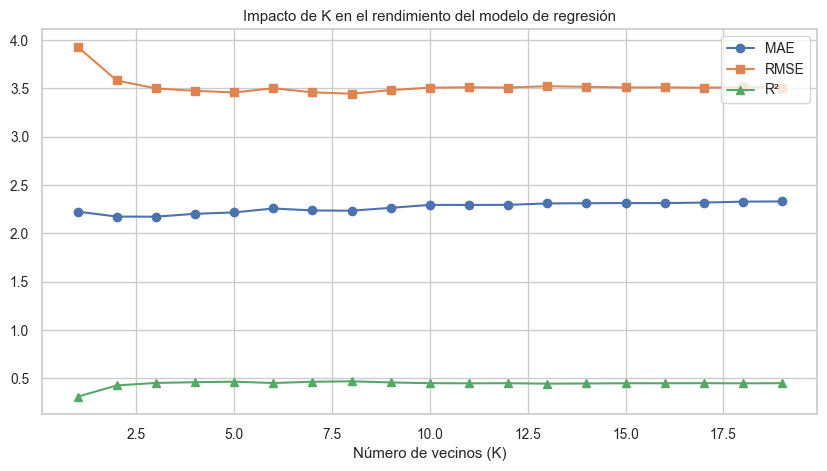

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(neighbors_settings, mae_list, label='MAE', marker='o')
plt.plot(neighbors_settings, rmse_list, label='RMSE', marker='s')
plt.plot(neighbors_settings, r2_list, label='R²', marker='^')
plt.xlabel("Número de vecinos (K)")
plt.title("Impacto de K en el rendimiento del modelo de regresión")
plt.legend()
plt.grid(True)
plt.show()


**Métricas Específicas para K=8**

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

Las métricas de desempeño presentadas a continuación —MAE, RMSE y R²— fueron obtenidas a partir de un modelo de regresión basado en el algoritmo K-Nearest Neighbors (KNN), configurado con un número de vecinos igual a ocho (k=8). Esta elección se fundamenta en un análisis comparativo previo, en el cual dicho valor demostró ser el más eficiente en términos de capacidad explicativa y precisión predictiva. La configuración del pipeline incluyó un bloque de preprocesamiento con escalado de variables numéricas y codificación de variables categóricas, lo que aseguró una preparación adecuada de los datos. Por tanto, las métricas aquí reportadas corresponden a la evaluación del modelo considerado más representativo y robusto dentro del rango explorado.
</div>


MAE: 2.23
RMSE: 3.44
R²: 0.471


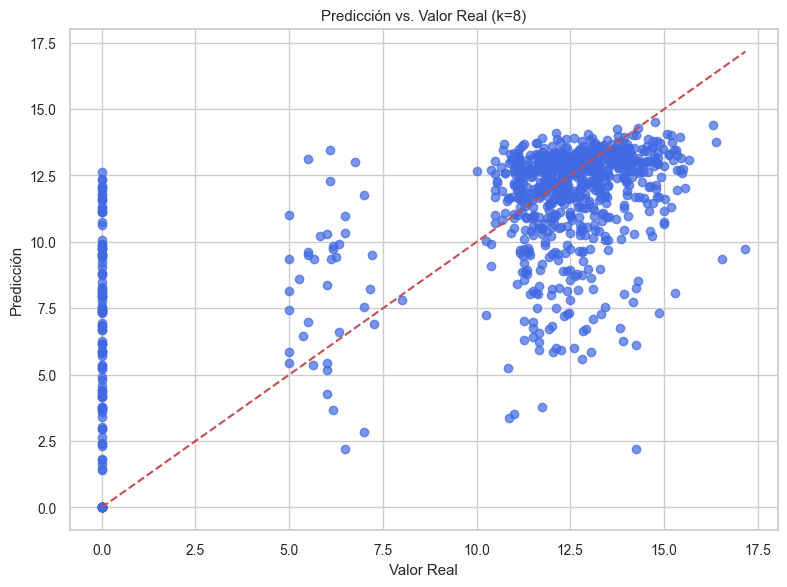

In [39]:
# Configuración del modelo KNN con k=8
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definición del pipeline completo con preprocesamiento
modelo_final = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=8))
])

# Entrenamiento del modelo
modelo_final.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = modelo_final.predict(X_test)

# Evaluación con métricas MAE, RMSE y R²
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")  # Se incluye más precisión para alinearlo con tu análisis anterior

# Función para visualizar predicción vs. valores reales
def graficar_pred_vs_real(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valor Real')
    plt.ylabel('Predicción')
    plt.title('Predicción vs. Valor Real (k=8)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

graficar_pred_vs_real(y_test, y_pred)


#### Gráfico de dispersión: Predicción vs. Valor Real (k = 8)
<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

El gráfico generado muestra la relación entre las predicciones del modelo KNN (con k = 8) y los valores reales del conjunto de prueba. La línea roja punteada representa la trayectoria ideal, donde las predicciones coincidirían exactamente con los valores observados. Se denotaron los siguientes aspectos:


- **Alineación general**: Aunque existe una cantidad importante de puntos cercanos a la línea de referencia, se observan desviaciones en múltiples regiones, lo que indica que el modelo logra capturar parcialmente la relación subyacente, pero aún incurre en errores de aproximación.

- **Agrupamientos definidos**: Los datos se distribuyen principalmente en tres zonas:
  - Un grupo concentrado en valores reales cercanos a cero, donde el modelo tiende a subestimar.
  - Un conjunto moderadamente disperso entre valores reales de 5 a 10, con mayor variabilidad en las predicciones.
  - Un clúster más denso alrededor de valores reales cercanos a 12.5, con mejor alineación y precisión relativa.

- **Rango de dispersión**: Las predicciones no alcanzan el valor máximo de la variable real (17.5), lo que evidencia que el modelo no extrapola correctamente hacia extremos superiores. Esta limitación es coherente con el funcionamiento del KNN, que depende de la cercanía a observaciones previamente vistas en el conjunto de entrenamiento.

La visualización respalda los resultados cuantitativos obtenidos mediante las métricas MAE, RMSE y R². El modelo muestra una capacidad moderada para aproximarse a los valores reales, especialmente en zonas donde la densidad de ejemplos es más alta. Sin embargo, se evidencian patrones de error y sesgo local que podrían corregirse en futuras iteraciones, ya sea ajustando el número de vecinos o explorando técnicas de ingeniería de atributos más específicas.

El análisis del modelo KNN en la regresión reveló un desempeño mixto que refleja tanto las fortalezas como las limitaciones inherentes de este algoritmo de aprendizaje basado en instancias. Si bien el modelo logró aproximaciones razonables a los valores reales en regiones donde la densidad de datos de entrenamiento era alta, mostró sesgos significativos en los extremos superiores del rango, evidenciando su incapacidad fundamental para extrapolar más allá del espacio cubierto por los ejemplos de entrenamiento. La métrica R² obtenida sugiere una capacidad moderada de explicabilidad, aunque los errores observados podrían atribuirse tanto a la insuficiencia de información estructural en los atributos disponibles como a una selección subóptima del hiperparámetro k. Las visualizaciones confirmaron que el comportamiento predictivo del modelo está fuertemente condicionado por la concentración local de vecinos, lo que abre oportunidades claras de mejora a través de la optimización sistemática de hiperparámetros, el desarrollo de ingeniería de atributos más sofisticada que capture mejor la variabilidad del fenómeno subyacente, y la evaluación comparativa de algoritmos alternativos como la regresión por bosque aleatorio o máquinas de vectores de soporte para regresión (SVR).
</div>


#### **Resultados** 

<div style="text-align: justify; font-size: 18px; font-family: Calibri, sans-serif; line-height: 1.2">

En este proyecto se aplicó el algoritmo K-Nearest Neighbors (KNN) a dos ejercicios de análisis predictivo: en primer lugar, la clasificación del abandono o no abandono académico y, en segundo lugar, la regresión del promedio final esperado. La implementación de ambas variantes reveló comportamientos diferenciados según la naturaleza del problema abordado, permitiendo identificar configuraciones óptimas específicas para cada contexto. Para el modelo de clasificación, se observó que k=9 obtuvo los mejores resultados individuales en precisión (84.8%), AUC (0.82) y accuracy (81.4%), sugiriendo un modelo confiable para emitir alertas con bajo margen de error, aunque con inquietudes respecto al sobreajuste. Sin embargo, el modelo con k=5 ofreció un mejor equilibrio al mantener una precisión competitiva y un recall más alto (53.8%), aspecto fundamental en el contexto universitario para identificar oportunamente a estudiantes en riesgo. En este sentido, se recomienda utilizar 5 vecinos más cercanos en ejercicios de prevención robusta, donde podría resultar costoso un falso negativo en el contexto de atención oportuna al estudiante. En contraste, el modelo de regresión para predecir el promedio final a partir del desempeño en primer y segundo semestre mostró que k=8 generó los mejores resultados globales, logrando el menor error cuadrático medio (RMSE = 3.44) y el mayor coeficiente de determinación (R² = 0.471), lo que indica una capacidad moderadamente fuerte para explicar la variabilidad del rendimiento académico. Aunque valores de k más bajos (como 2 o 3) arrojaron un error absoluto medio menor (MAE ≈ 2.17), implicaron predicciones muy inestables, por lo que k=8 se recomienda por su robustez y precisión global, evidenciando que la selección del hiperparámetro K debe balancear no solo la minimización del error, sino también la estabilidad predictiva según el contexto específico del problema.

Respecto al Valor Óptimo de K por Tipo de Modelo, se encontro que la determinación del valor óptimo de k en los algoritmos K-Nearest Neighbors requiere un análisis cuidadoso del compromiso entre precisión, estabilidad y las características específicas del problema a resolver. Para el modelo de clasificación orientado a predecir el abandono académico, k = 5 emerge como el valor óptimo al lograr un equilibrio superior entre sensibilidad (recall) y métricas de precisión y AUC elevadas, configuración que resulta especialmente valiosa en contextos donde los falsos negativos representan un alto costo, como es el caso del seguimiento y atención oportuna de estudiantes en riesgo de deserción. Por otro lado, en el modelo de regresión diseñado para predecir el promedio final del estudiante, k = 8 ofrece el mejor compromiso entre precisión predictiva y capacidad explicativa del fenómeno, ya que minimiza efectivamente el error cuadrático medio (RMSE) mientras maximiza el coeficiente de determinación (R²), convirtiéndolo en la configuración más robusta y confiable para la predicción del desempeño académico futuro, evidenciando que la selección óptima del hiperparámetro debe considerar tanto las métricas de rendimiento como las implicaciones prácticas y el contexto específico de aplicación del modelo.

La determinación del valor óptimo de k en los algoritmos K-Nearest Neighbors requiere un análisis cuidadoso del compromiso entre precisión, estabilidad y las características específicas del problema a resolver. Para el modelo de clasificación orientado a predecir el abandono académico, k = 5 emerge como el valor óptimo al lograr un equilibrio superior entre sensibilidad (recall) y métricas de precisión y AUC elevadas, configuración que resulta especialmente valiosa en contextos donde los falsos negativos representan un alto costo, como es el caso del seguimiento y atención oportuna de estudiantes en riesgo de deserción. Por otro lado, en el modelo de regresión diseñado para predecir el promedio final del estudiante, k = 8 ofrece el mejor compromiso entre precisión predictiva y capacidad explicativa del fenómeno, ya que minimiza efectivamente el error cuadrático medio (RMSE) mientras maximiza el coeficiente de determinación (R²), convirtiéndolo en la configuración más robusta y confiable para la predicción del desempeño académico futuro.
Los resultados obtenidos evidencian la utilidad del algoritmo K-Nearest Neighbors como herramienta predictiva en contextos educativos, tanto para predecir el riesgo de abandono como para estimar el rendimiento académico futuro. Su simplicidad conceptual e interpretabilidad lo convierten en una opción valiosa para entornos donde la comprensión del modelo es crucial para el análisis institucional y la toma de decisiones estratégicas en acciones de prevención de deserción. Además, al ser un modelo basado en instancias, KNN no requiere entrenamiento complejo ni supuestos fuertes sobre la distribución de los datos, ofreciendo versatilidad para trabajar con diferentes tipos de variables (socioeconómicas, académicas o contextuales) y permitiendo implementación directa sin necesidad de una fase de entrenamiento extensiva, lo cual resulta útil cuando se cuenta con recursos computacionales limitados.
Sin embargo, KNN también presenta limitaciones significativas que deben considerarse para garantizar la fiabilidad de los resultados. El algoritmo muestra alta sensibilidad a la escala de las variables, haciendo obligatoria la normalización o estandarización previa de los datos, mientras que su dependencia del valor de k requiere una selección cuidadosa que puede resultar discrecional y exige validación rigurosa, dado que pequeños cambios pueden alterar significativamente el rendimiento. Adicionalmente, presenta desafíos de escalabilidad en escenarios de alta dimensionalidad o conjuntos de datos muy grandes, ya que su funcionamiento se basa en el cálculo de distancias para cada predicción, requiriendo comparar cada instancia con todo el conjunto de entrenamiento. Finalmente, variables mal normalizadas o con ruido afectan fuertemente su desempeño, y el modelo no puede extrapolar más allá del espacio observado, limitación crítica especialmente en aplicaciones de regresión. Por tanto, K-Nearest Neighbors representa una opción viable y robusta que requiere el acompañamiento de un análisis riguroso del contexto, la calidad de los datos y los objetivos específicos de interpretación para maximizar su efectividad en aplicaciones educativas reales.

</div>